# 🍷 Анализ рынка вина: что влияет на цену и рейтинг?

## Описание проекта 
Анализ рынка вина для выявления ключевых факторов, влияющих на цену и рейтинг продукции. Исследование включает сравнительный анализ традиционных винодельческих регионов (Старый Свет) и новых рынков (Новый Свет).

**Источник данных:** [Kaggle - Wine Reviews](https://www.kaggle.com/datasets/zynicide/wine-reviews)

## Задачи раздела Исследовательский анализ данных:
- Провести разведочный анализ данных (EDA)
- Выявить значимые признаки для рейтинга вина
- Выявить самые популярные и дорогие сорта вин
- Проанализировать географические паттерны
- Исследовать влияние экспертов на оценки
- Сегментировать рынок по ценам и качеству

## Методология анализа:
1. **Общая статистика и распределения** - базовые метрики и корреляции
2. **Географические паттерны** - распределение по странам и континентам
3. **Сорта и типы вин** - популярность и ценовые характеристики
4. **Эксперты и рейтинги** - стили оценки и предпочтения
5. **Ценовой анализ** - сегментация рынка
6. **Кросс-анализ** - взаимосвязи между признаками

## Оглавление

1. Общая статистика и распределения
2. Анализ географического распределения
3. Сорта и типы вин + цветовая классификация
4. Анализ возрастных характеристик вина
5. Сегментация цен на вино
6. Обзоры, эксперты и рейтинги
7. Влияние рейтинга вина на его цену
8. Влияние категориальных признаков на стоимость и рейтинг
9. Кросс-анализ рынка: комплексные взаимосвязи
10. Ключевые инсайты и выводы

---

## Описание данных
Набор данных состоит из 13 признаков (2 числовых и 11 категориальных):

| Признак | Тип | Описание | Заполненность |
|---------|-----|----------|---------------|
| `country` | Категориальный | Страна происхождения вина | 100% |
| `description` | Текстовый | Описание вкусового профиля вина | 100% |
| `designation` | Категориальный | Виноградник происхождения ягод | 100% |
| `points` | Числовой | Оценка вина по шкале от 80 до 100 | 100% |
| `price` | Числовой | Стоимость одной бутылки (у.е.) | 100% |
| `province` | Категориальный | Регион производства (провинция/штат) | 100% |
| `region_1` | Категориальный | Винодельческая область в провинции | 100% |
| `taster_name` | Текстовый | Имя автора рецензии | 79.2% |
| `taster_twitter_handle` | Текстовый | Твиттер-аккаунт рецензента | 75.5% |
| `title` | Текстовый | Полное название вина | 100% |
| `variety` | Категориальный | Сорт винограда | 100% |
| `winery` | Категориальный | Винодельня-производитель | 100% |
| `continent` | Категориальный | Континент происхождения | 100% |
| `color` | Категориальный | Цвет вина (5 категорий) | 100% |
| `year` | Числовой | Год производства вина | 96.4% |
| `wine_age` | Числовой | Возраст вина на момент обзора | 96.4% |
| `age_category` | Категориальный | Категория выдержки вина | 96.4% |

## 0. Импорт библиотек и загрузка данных

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='white', palette='rocket', color_codes=True)
import squarify

from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

import warnings; warnings.filterwarnings('ignore', category=FutureWarning)

Загружаем данные, подготовленные и сохранённые в 01_Data_Preprocessing.ipynb в формате *.csv

In [2]:
dtype_mapping = {
   'country':'category',
   'designation':'category',
   'province':'category', 
   'region_1':'category',
   'variety':'category',
   'winery':'category',
   'continent':'category',
   'color':'category',
   'age_category':'category',
   'year':'Int64',
   'wine_age':'Int64'
}

df = pd.read_csv('../data/wine_reviews_cleaned.csv', dtype=dtype_mapping)

df.sample(2)

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,continent,color,year,wine_age,age_category
41125,US,This is a sort of junior version of Swan's awe...,Trenton View Vineyard,91,35.0,California,Russian River Valley,NaN,NaN,Joseph Swan Vineyards 2007 Trenton View Vineya...,Pinot Noir,Joseph Swan Vineyards,North America,red,2007,10,Выдержанное
75061,US,"Richly barrel fermented, this wine shares its ...",Estate Vineyards,88,22.0,California,Chalk Hill,Virginie Boone,@vboone,Rodney Strong 2015 Estate Vineyards Chardonnay...,Chardonnay,Rodney Strong,North America,white,2015,2,Молодое


In [3]:
df.dtypes

country                  category
description                object
designation              category
points                      int64
price                     float64
province                 category
region_1                 category
taster_name                object
taster_twitter_handle      object
title                      object
variety                  category
winery                   category
continent                category
color                    category
year                        Int64
wine_age                    Int64
age_category             category
dtype: object

## 1. Общая статистика и распределения
Анализ основных числовых признаков: рейтинги, цены и возраст вин  
Исследование распределений, корреляций и трансформаций данных

### 1.1 Матрица корреляции

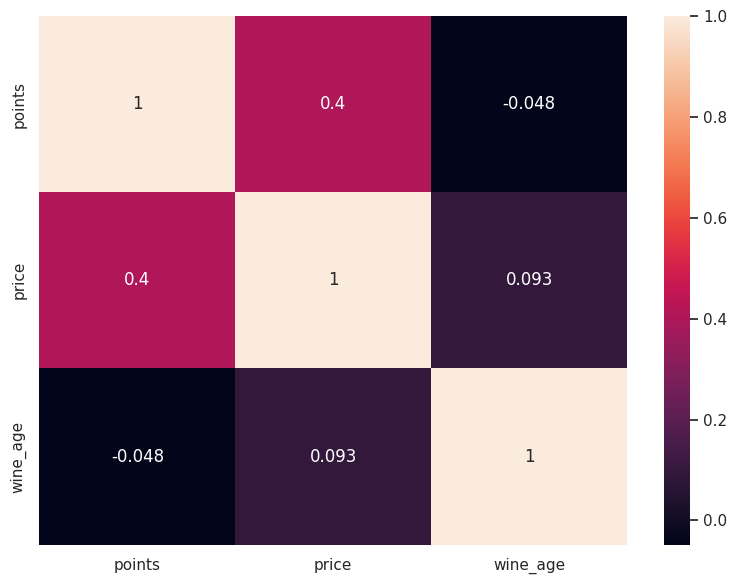

In [4]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['points','price','wine_age']].corr(), annot=True)
plt.tight_layout() 
plt.show()

In [5]:
def interpret_correlation(value, feature1, feature2):
    abs_value = abs(value)
    if abs_value >= 0.7:
        strength ='сильная'
    elif abs_value >= 0.5:
        strength ='умеренная' 
    elif abs_value >= 0.3:
        strength ='слабая'
    else:
        strength ='очень слабая'
    
    direction ='положительная' if value > 0 else'отрицательная'
    
    return f'{strength} {direction} связь'

corr = df[['points','price','wine_age']].corr()

features = [
    ('price','points','Цена','Рейтинг'),
    ('wine_age','points','Возраст','Рейтинг'), 
    ('wine_age','price','Возраст','Цена')
]

for feat1, feat2, name1, name2 in features:
    corr_value = corr.loc[feat1, feat2]
    interpretation = interpret_correlation(corr_value, name1, name2)
    
    print(f'{name1} ↔ {name2}: r = {corr_value:.3f}')
    print(f'   - {interpretation}')

Цена ↔ Рейтинг: r = 0.404
   - слабая положительная связь
Возраст ↔ Рейтинг: r = -0.048
   - очень слабая отрицательная связь
Возраст ↔ Цена: r = 0.093
   - очень слабая положительная связь


### 1.2 Матрица диаграмм рассеяния

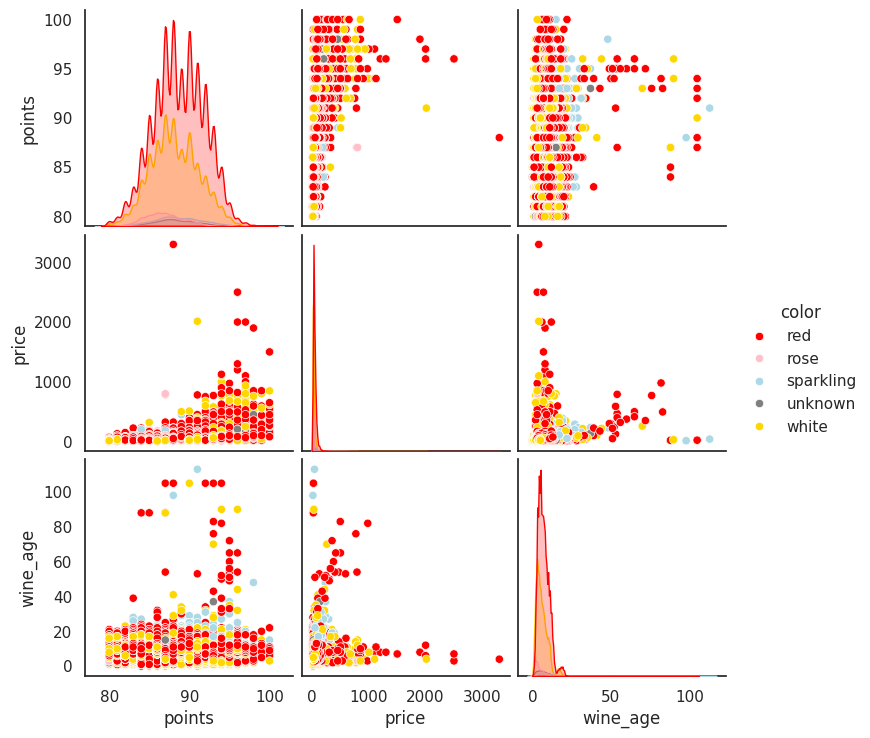

In [6]:
sns.pairplot(df[['points','price','wine_age','color']], 
             hue='color', 
             palette={'red':'red','white':'gold','rose':'pink', 
                    'sparkling':'lightblue','unknown':'gray'})
plt.show()

   - Возрастная структура: экспоненциальное распределение с преобладанием молодых вин
   - Ценовое распределение: полимодальное с концентрацией в низком ценовом сегменте
   - Линейные зависимости: слабо выражены визуально
   - Группировка данных: отсутствует четкая кластеризация по цветовым категориям
   - Сбалансированность: удовлетворительная по цвету вина
   - По стоимости есть много выбросов, большая скученность данных.
   - Создаем логарифмированную цену (разница в 1 единицу = цена отличается в ~2.7 раза)

### 1.3 Анализ распределений (асимметрия - skewness и эксцесс - kurtosis).

In [7]:
def analyze_distribution(data, column_name, display_name=None):

    if display_name is None:
        display_name = column_name
    
    # Статистики
    skewness = data[column_name].skew()
    kurt = data[column_name].kurtosis()
    median = data[column_name].median()
    mean = data[column_name].mean()
    std = data[column_name].std()
    
    print(f'📊 Анализ распределения {display_name}: ')
    print(f'Асимметрия: {skewness:.2f} ')
    print(f'Эксцесс: {kurt:.2f}\n ')
    
    # Интерпретация асимметрии
    if skewness > 2:
        print('🎯 Асимметрия: очень сильная правая ')
        print('   • Распределение сильно смещено влево ')
        print('   • Подавляющее большинство значений сосредоточено в начале диапазона ')
        print('   • Длинный хвост экстремально высоких значений ')
        print('   • Среднее значение значительно выше медианы ')
        
    elif skewness > 1:
        print('🎯 Асимметрия: сильная правая ')
        print('   • Большинство значений низкие, но есть высокие выбросы ')
        print('   • Распределение смещено в сторону низких значений ')
        print('   • Присутствуют экстремально высокие значения ')
        print('   • Среднее значение завышено относительно медианы ')
        
    elif skewness > 0.5:
        print('🎯 Асимметрия: умеренная правая ')
        print('   • Распределение слегка смещено влево ')
        print('   • Больше низких значений, чем высоких ')
        print('   • Среднее и медиана близки, но среднее немного выше ')
        
    elif abs(skewness) <= 0.5:
        print('🎯 Асимметрия: приблизительно симметричное ')
        print('   • Распределение близко к симметричному ')
        print('   • Среднее и медиана практически совпадают ')
        print('   • Данные равномерно распределены вокруг центра ')
        
    elif skewness < -0.5:
        print('🎯 Асимметрия: умеренная левая ')
        print('   • Распределение слегка смещено вправо ')
        print('   • Больше высоких значений, чем низких ')
        print('   • Среднее значение ниже медианы ')
        
    elif skewness < -1:
        print('🎯 Асимметрия: сильная левая ')
        print('   • Большинство значений сосредоточено в конце диапазона ')
        print('   • Присутствуют экстремально низкие значения ')
        print('   • Среднее значение занижено относительно медианы ')
        
    else:
        print('🎯 Асимметрия: очень сильная левая ')
        print('   • Распределение сильно смещено вправо ')
        print('   • Подавляющее большинство значений - высокие ')
        print('   • Длинный хвост экстремально низких значений ')
    
    # Интерпретация эксцесса
    if kurt > 10:
        print('🎯 Эксцесс: очень высокий (экстремально лептокуртическое) ')
        print('   • Очень острый пик и чрезвычайно тяжелые хвосты ')
        print('   • Огромное количество экстремальных выбросов ')
        print('   • Данные сильно сконцентрированы вокруг среднего ')
        print('   • Высокий риск непредсказуемых экстремальных значений ')
        
    elif kurt > 5:
        print('🎯 Эксцесс: высокий (сильно лептокуртическое) ')
        print('   • Острый пик и тяжелые хвосты ')
        print('   • Много экстремальных значений в хвостах распределения ')
        print('   • Высокая концентрация данных вокруг центра ')
        print('   • Значительное количество выбросов ')
        
    elif kurt > 3:
        print('🎯 Эксцесс: лептокуртическое (островершинное) ')
        print('   • Более острый пик, чем у нормального распределения ')
        print('   • Тяжелые хвосты - много экстремальных значений ')
        print('   • Данные сконцентрированы вокруг среднего ')
        print('   • Повышенная вероятность выбросов ')
        
    elif 1 <= kurt <= 3:
        print('🎯 Эксцесс: мезокуртическое (нормальное) ')
        print('   • Распределение близко к нормальному ')
        print('   • Умеренные хвосты, умеренный пик ')
        print('   • Стандартное количество выбросов ')
        print('   • Надежные статистические выводы ')
        
    elif 0 <= kurt < 1:
        print('🎯 Эксцесс: слабо платикуртическое ')
        print('   • Слегка более плоский пик, чем у нормального ')
        print('   • Более легкие хвосты ')
        print('   • Меньше экстремальных значений ')
        print('   • Более равномерное распределение ')
        
    elif -1 <= kurt < 0:
        print('🎯 Эксцесс: платикуртическое (пологое) ')
        print('   • Пологий пик и легкие хвосты ')
        print('   • Мало экстремальных значений ')
        print('   • Данные более равномерно распределены ')
        print('   • Меньше выбросов, более предсказуемое распределение ')
        
    else:
        print('🎯 Эксцесс: сильно платикуртическое (очень пологое) ')
        print('   • Очень пологий пик и очень легкие хвосты ')
        print('   • Практически отсутствуют экстремальные значения ')
        print('   • Данные почти равномерно распределены ')
        print('   • Очень мало выбросов ')
    
    # Комбинированная интерпретация
    print(f'\n💡 Комбинированная интерпретация: ')
    if skewness > 1 and kurt > 3:
        print('• 📈 Распределение: сильно асимметричное с тяжелыми хвостами ')
        print('• 🎯 Данные поляризованы: много низких + много высоких значений ')
        print('• ⚠️ Среднее значение ненадежно - используйте медиану ')
        print('• 📊 Высокий риск экстремальных значений ')
        
    elif skewness > 0.5 and abs(kurt - 3) < 1:
        print('• 📈 Распределение: умеренно асимметричное ')
        print('• 🎯 Типичное распределение с преобладанием низких значений ')
        print('• 📊 Статистические методы достаточно надежны ')
        
    elif abs(skewness) < 0.5 and abs(kurt - 3) < 1:
        print('• 📈 Распределение: близко к нормальному ')
        print('• 🎯 Сбалансированное распределение ')
        print('• 📊 Высокая надежность статистических выводов ')
    
    print(f'\n📊 Числовые характеристики: ')
    print(f'• Медиана (median): {median:.2f} ')
    print(f'• Среднее (mean): {mean:.2f} ')
    print(f'• Разница (mean - median): {mean - median:.2f} ')
    print(f'• Стандартное отклонение (std): {std:.2f} ')
    print(f'• Коэффициент вариации (std/mean): {(std/mean)*100:.1f}% ')

In [8]:
analyze_distribution(df,'price','цен')

📊 Анализ распределения цен: 
Асимметрия: 18.34 
Эксцесс: 851.56
 
🎯 Асимметрия: очень сильная правая 
   • Распределение сильно смещено влево 
   • Подавляющее большинство значений сосредоточено в начале диапазона 
   • Длинный хвост экстремально высоких значений 
   • Среднее значение значительно выше медианы 
🎯 Эксцесс: очень высокий (экстремально лептокуртическое) 
   • Очень острый пик и чрезвычайно тяжелые хвосты 
   • Огромное количество экстремальных выбросов 
   • Данные сильно сконцентрированы вокруг среднего 
   • Высокий риск непредсказуемых экстремальных значений 

💡 Комбинированная интерпретация: 
• 📈 Распределение: сильно асимметричное с тяжелыми хвостами 
• 🎯 Данные поляризованы: много низких + много высоких значений 
• ⚠️ Среднее значение ненадежно - используйте медиану 
• 📊 Высокий риск экстремальных значений 

📊 Числовые характеристики: 
• Медиана (median): 25.00 
• Среднее (mean): 35.22 
• Разница (mean - median): 10.22 
• Стандартное отклонение (std): 40.84 
• Коэфф

### 1.4 Логарифмирование и сравнение результатов

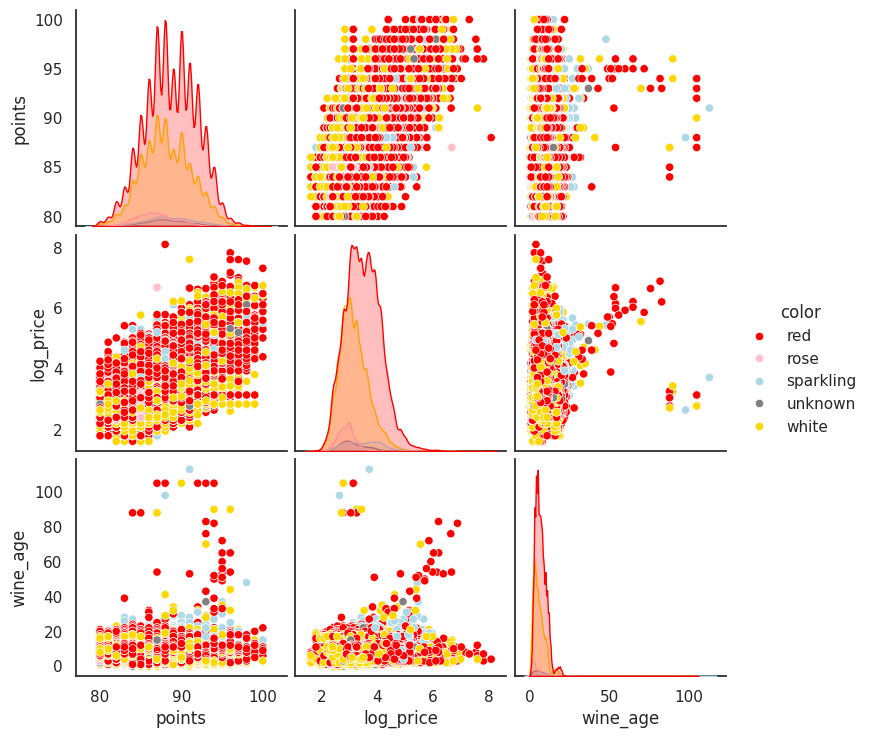

In [9]:
df['log_price'] = np.log1p(df['price'])

sns.pairplot(df[['points','log_price','wine_age','color']], 
             hue='color',
             palette={'red':'red','white':'gold','rose':'pink', 
                    'sparkling':'lightblue','unknown':'gray'})
plt.show()

In [10]:
analyze_distribution(df,'log_price','логарифмированных цен')

📊 Анализ распределения логарифмированных цен: 
Асимметрия: 0.67 
Эксцесс: 0.93
 
🎯 Асимметрия: умеренная правая 
   • Распределение слегка смещено влево 
   • Больше низких значений, чем высоких 
   • Среднее и медиана близки, но среднее немного выше 
🎯 Эксцесс: слабо платикуртическое 
   • Слегка более плоский пик, чем у нормального 
   • Более легкие хвосты 
   • Меньше экстремальных значений 
   • Более равномерное распределение 

💡 Комбинированная интерпретация: 

📊 Числовые характеристики: 
• Медиана (median): 3.26 
• Среднее (mean): 3.36 
• Разница (mean - median): 0.10 
• Стандартное отклонение (std): 0.63 
• Коэффициент вариации (std/mean): 18.6% 


* Сравнение до/после логарифмирования

In [11]:
print(f'• Асимметрия уменьшилась с {df['price'].skew():.2f} до {df['log_price'].skew():.2f}')
print(f'• Эксцесс уменьшился с {df['price'].kurtosis():.2f} до {df['log_price'].kurtosis():.2f}')
print(f'• Эффективность трансформации: {'высокая' if abs(df['price'].skew() - df['log_price'].skew()) > 2 else'умеренная'}')

• Асимметрия уменьшилась с 18.34 до 0.67
• Эксцесс уменьшился с 851.56 до 0.93
• Эффективность трансформации: высокая


### 1.5 Итоговые выводы

#### 📈 Ключевые статистические закономерности

**• Распределение цен: сильная правая асимметрия**
- Большинство вин сосредоточено в бюджетном сегменте (медиана: 25 у.е.)
- Наличие длинного хвоста премиальных вин (до 3,300 у.е.)
- Средняя цена (35 у.е.) завышена из-за выбросов

#### 🔄 Эффективность преобразований

**• Логарифмирование цен: высокая эффективность**  
- Асимметрия уменьшилась с 18.34 до 0.67
- Эксцесс уменьшился с 851.56 до 0.93
- Распределение стало ближе к нормальному

#### 🔗 Корреляционные взаимосвязи

**• Цена ↔ рейтинг: умеренная положительная (r = 0.42)**
- Более дорогие вина имеют тенденцию к более высоким рейтингам
- Связь недостаточно сильная для надежного прогнозирования

**• Возраст ↔ цена/рейтинг: очень слабая связь**
- Возраст вина не является значимым фактором цены или качества

#### 📊 Качество данных и готовность к анализу

**• Распределение рейтингов: близко к нормальному**
- Диапазон 80-100 баллов, медиана 88
- Умеренная вариативность (std = 3.1)

**• Рекомендуемые метрики для анализа:**
- Цены: использовать log_price для для статистического анализа
- Рейтинги: исходные значения достаточно надежны
- Медиана: предпочтительнее среднего для цен

## 2. Анализ географического распределения  

* География, общая статистика

In [12]:
print(f'• Всего континентов: {df['continent'].nunique()}')
print(f'• Всего стран: {df['country'].nunique()}')
print(f'• Всего регионов/провинций: {df['province'].nunique()}')
print(f'• Всего винодельческих областей: {df['region_1'].nunique()}')

• Всего континентов: 6
• Всего стран: 43
• Всего регионов/провинций: 425
• Всего винодельческих областей: 1601


* Распределение по континентам

In [13]:
continent_stats = df.groupby('continent').agg({
   'country':'nunique',
   'points':'mean',
   'price':'mean',
   'variety':'nunique',
   'color': lambda x: x.mode()[0] 
}).round(2).sort_values('country', ascending=False)

print(continent_stats)

               country  points  price  variety color
continent                                           
Europe              24   88.62  36.18      563   red
Asia                 6   88.38  30.39       63   red
Latin America        6   86.52  22.60      106   red
Africa               3   88.04  24.46       59   red
North America        2   88.56  36.67      258   red
Oceania              2   88.47  32.32       72   red


Красное вино доминирует на всех континетах

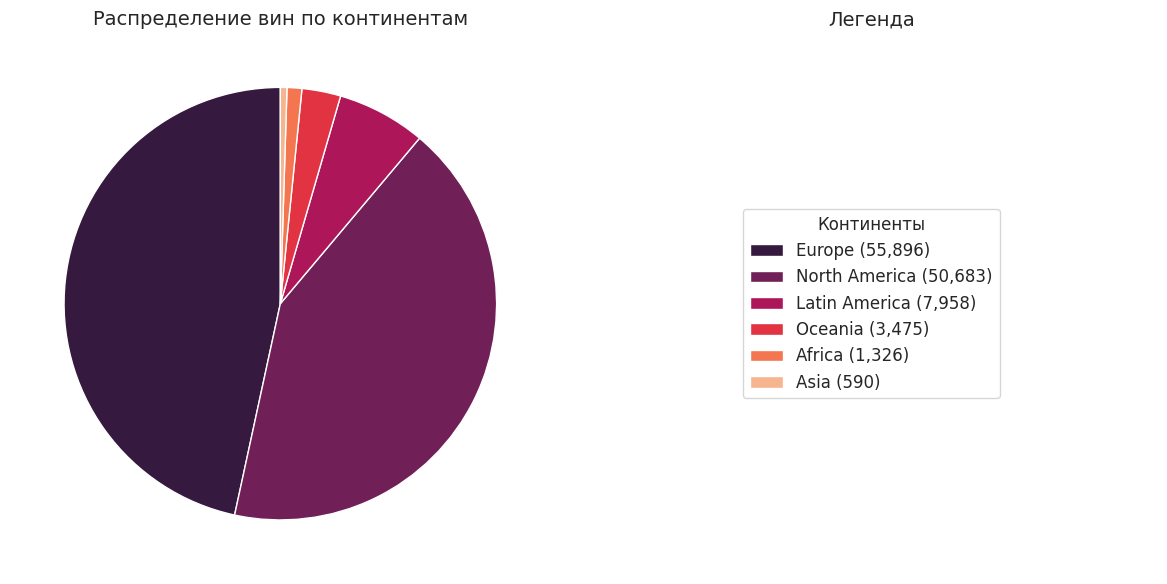

In [14]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) 
continent_data = df['continent'].value_counts()
patches, texts = plt.pie(continent_data.values,
                        labels=None, 
                        autopct=None,
                        startangle=90)
plt.title('Распределение вин по континентам', fontsize=14)

plt.subplot(1, 2, 2)
plt.axis('off') 
legend_labels = [f'{continent} ({count:,})' for continent, count in continent_data.items()]
plt.legend(patches, legend_labels, 
          title='Континенты', 
          loc='center', 
          frameon=True,
          fontsize=12)
plt.title('Легенда', fontsize=14)

plt.tight_layout()
plt.show()

* Цвета вин по континентам

<Figure size 1200x800 with 0 Axes>

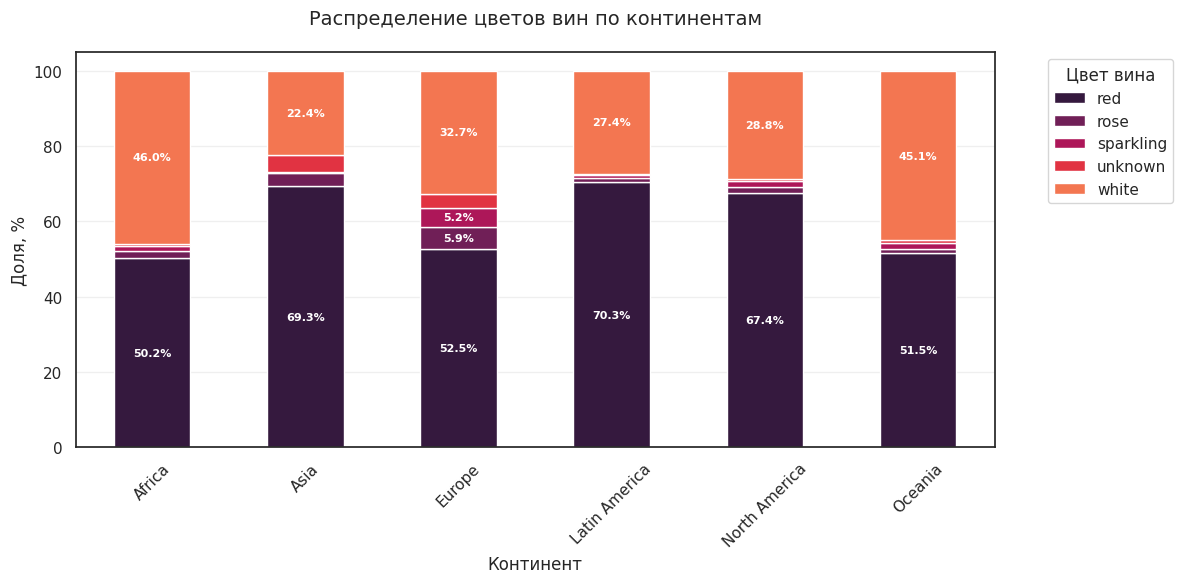

In [15]:
plt.figure(figsize=(12, 8))
color_by_continent = pd.crosstab(df['continent'], df['color'], normalize='index') * 100
ax = color_by_continent.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Распределение цветов вин по континентам', fontsize=14, pad=20)
plt.xlabel('Континент')
plt.ylabel('Доля, %')
plt.legend(title='Цвет вина', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

for container in ax.containers:
    # container - один цветовой слой на всех столбцах
    # container.datavalues - значения этого цвета для каждого столбца
    ax.bar_label(container, labels=[f'{v:.1f}%' if v > 5 else'' for v in container.datavalues], 
                label_type='center', fontsize=8, color='white', fontweight='bold')

plt.tight_layout()
plt.show()

* Treemap: распределение вин по странам  
  подвыборка для скорости 10K записей

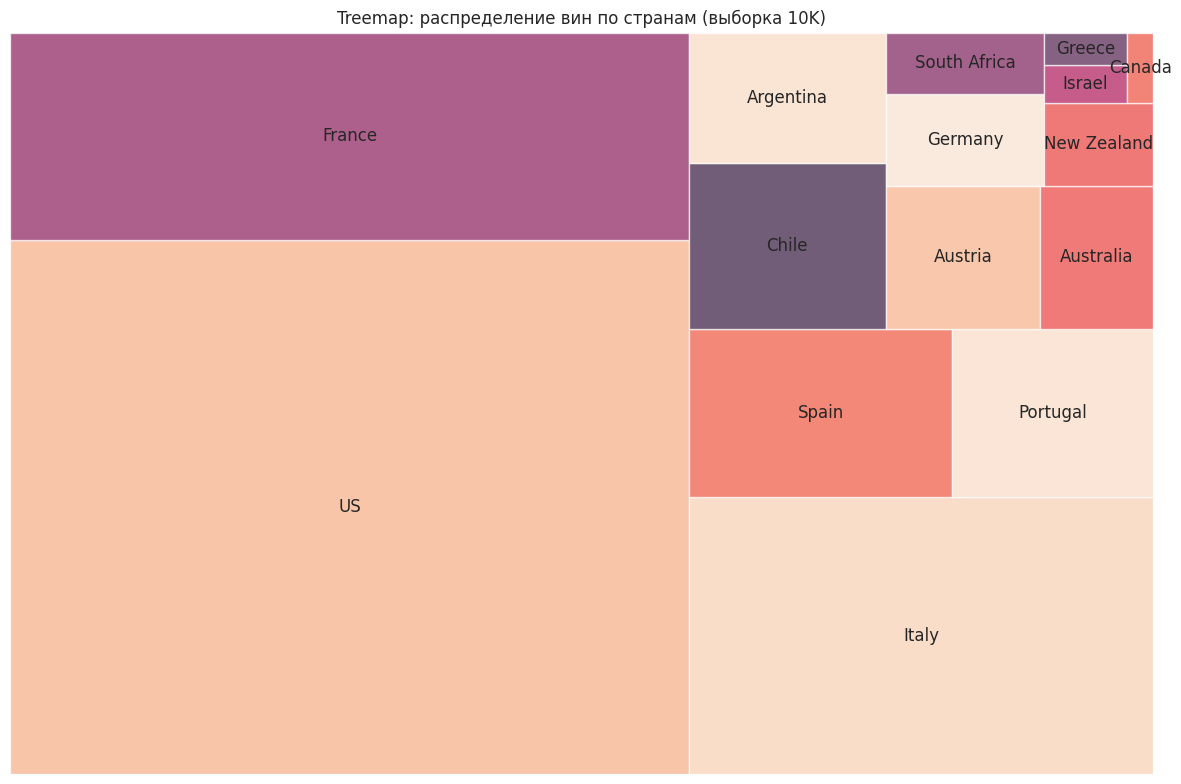

In [16]:
sample_df = df.sample(10000, random_state=26)
country_counts = sample_df['country'].value_counts().head(15)

plt.figure(figsize=(12, 8))
squarify.plot(sizes=country_counts.values, 
              label=country_counts.index, 
              alpha=0.7)
plt.title('Treemap: распределение вин по странам (выборка 10K)')
plt.axis('off')
plt.tight_layout()
plt.show()

* Топ-10 стран по количеству записей

In [17]:
top_countries = df['country'].value_counts().head(10)
for i, (country, count) in enumerate(top_countries.items(), 1):
    percentage = (count / len(df)) * 100
    print(f'{i}. {country}: {count:,} вин ({percentage:.1f}%)')

1. US: 50,457 вин (42.1%)
2. France: 20,353 вин (17.0%)
3. Italy: 17,940 вин (15.0%)
4. Spain: 6,116 вин (5.1%)
5. Portugal: 5,256 вин (4.4%)
6. Chile: 4,183 вин (3.5%)
7. Argentina: 3,544 вин (3.0%)
8. Austria: 3,034 вин (2.5%)
9. Australia: 2,197 вин (1.8%)
10. Germany: 1,992 вин (1.7%)


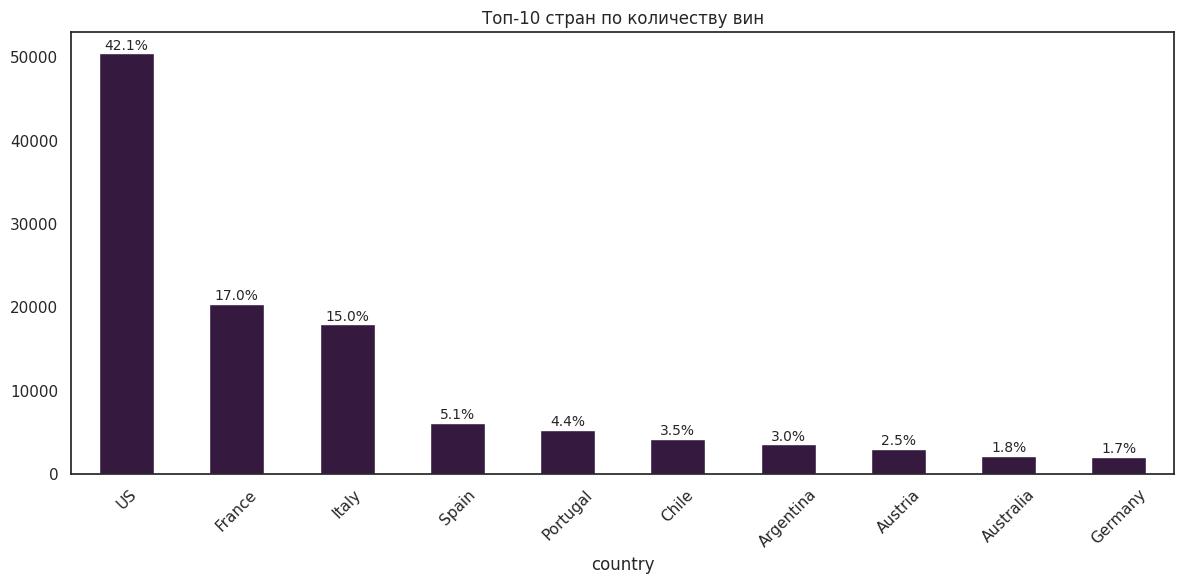

In [18]:
plt.figure(figsize=(12, 6))

top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar')

plt.title('Топ-10 стран по количеству вин')
plt.xticks(rotation=45)

total_wines = len(df)
for i, count in enumerate(top_countries.values):
    percentage = (count / total_wines) * 100
    plt.text(i, count + 100, f'{percentage:.1f}%', 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

* Доминирующие страны/регионы (80% рынка)

In [19]:
total_wines = len(df)
cumulative_percentage = 0
countries_80 = []

for i, (country, count) in enumerate(df['country'].value_counts().items(), 1):
    percentage = (count / total_wines) * 100
    cumulative_percentage += percentage
    countries_80.append(country)
    
    if cumulative_percentage >= 80: 
        print(f'⭐ 80% датасета покрывают {i} стран из {df['country'].nunique()}')
        print(f'📊 Это {i/df['country'].nunique()*100:.1f}% от общего числа стран')
        break

print(f'\n🎯 Страны, формирующие 80% датасета:')
for country in countries_80:
    count = df[df['country'] == country].shape[0]
    percentage = (count / total_wines) * 100
    print(f'   • {country}: {percentage:.1f}%')

⭐ 80% датасета покрывают 5 стран из 43
📊 Это 11.6% от общего числа стран

🎯 Страны, формирующие 80% датасета:
   • US: 42.1%
   • France: 17.0%
   • Italy: 15.0%
   • Spain: 5.1%
   • Portugal: 4.4%


* Анализ для топ-3 стран

In [20]:
top_3_countries = df['country'].value_counts().head(3).index
for country in top_3_countries:
    country_data = df[df['country'] == country]
    print(f'\n📌 {country}:')
    print(f'   • Регионов: {country_data['province'].nunique()}')
    print(f'   • Винодельческих областей: {country_data['region_1'].nunique()}')
    
    print(f'   Топ-3 региона по количеству вин:')
    top_regions = country_data['province'].value_counts().head(3)
    for region, count in top_regions.items():
        percentage = (count / len(country_data)) * 100
        print(f'      • {region}: {count} вин ({percentage:.1f}%)')


📌 US:
   • Регионов: 27
   • Винодельческих областей: 266
   Топ-3 региона по количеству вин:
      • California: 33656 вин (66.7%)
      • Washington: 7965 вин (15.8%)
      • Oregon: 4929 вин (9.8%)

📌 France:
   • Регионов: 11
   • Винодельческих областей: 392
   Топ-3 региона по количеству вин:
      • Bordeaux: 5556 вин (27.3%)
      • Burgundy: 3683 вин (18.1%)
      • Alsace: 2219 вин (10.9%)

📌 Italy:
   • Регионов: 10
   • Винодельческих областей: 384
   Топ-3 региона по количеству вин:
      • Tuscany: 5391 вин (30.1%)
      • Piedmont: 3441 вин (19.2%)
      • Veneto: 2501 вин (13.9%)


 Страны, формирующие 80% датасета:
* US: 42.1%
* France: 17.0%
* Italy: 15.0%
* Spain: 5.1%
* Portugal: 4.4%

На всех континентах в основном представлены красные вина

## 3. Сорта и типы вин

* Топ-5 популярных сортов винограда

In [21]:
variety_stats = df['variety'].value_counts().head(5)
variety_stats_extended = df.groupby('variety').agg({
   'price': ['mean','median'],
   'points':'mean',
   'color': lambda x: x.mode()[0]
}).round(2)

top_varieties_stats = variety_stats_extended.loc[variety_stats.index]
for i, (variety, count) in enumerate(variety_stats.items(), 1):
    stats = top_varieties_stats.loc[variety]
    percentage = (count / len(df)) * 100
    print(f'{i}. {variety}:')
    print(f'   • Количество: {count:,} вин ({percentage:.1f}%)')
    print(f'   • Средняя цена: {stats[('price', 'mean')]:.1f} у.е.')
    print(f'   • Медианная цена: {stats[('price', 'median')]:.1f} у.е.')
    print(f'   • Средний рейтинг: {stats[('points', 'mean')]:.1f}')
    print(f'   • Основной цвет: {stats[('color', '<lambda>')]}')

1. Pinot Noir:
   • Количество: 12,275 вин (10.2%)
   • Средняя цена: 48.2 у.е.
   • Медианная цена: 43.0 у.е.
   • Средний рейтинг: 89.4
   • Основной цвет: red
2. Chardonnay:
   • Количество: 10,865 вин (9.1%)
   • Средняя цена: 34.7 у.е.
   • Медианная цена: 28.0 у.е.
   • Средний рейтинг: 88.3
   • Основной цвет: white
3. Cabernet Sauvignon:
   • Количество: 8,838 вин (7.4%)
   • Средняя цена: 48.1 у.е.
   • Медианная цена: 37.0 у.е.
   • Средний рейтинг: 88.6
   • Основной цвет: red
4. Red Blend:
   • Количество: 8,233 вин (6.9%)
   • Средняя цена: 35.7 у.е.
   • Медианная цена: 28.0 у.е.
   • Средний рейтинг: 88.4
   • Основной цвет: red
5. Bordeaux-style Red Blend:
   • Количество: 6,471 вин (5.4%)
   • Средняя цена: 42.0 у.е.
   • Медианная цена: 23.0 у.е.
   • Средний рейтинг: 89.1
   • Основной цвет: red


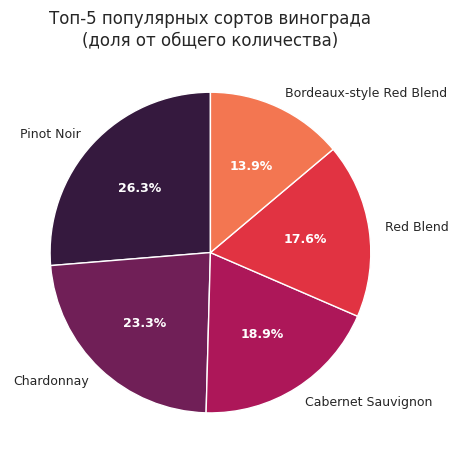

In [22]:
wedges, texts, autotexts = plt.pie(variety_stats.values, labels=variety_stats.index,
                                  autopct='%1.1f%%', startangle=90, 
                                  textprops={'fontsize': 9})
plt.title('Топ-5 популярных сортов винограда\n(доля от общего количества)', fontsize=12)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
plt.tight_layout() 
plt.show()

* Распределение цвета по набору данных

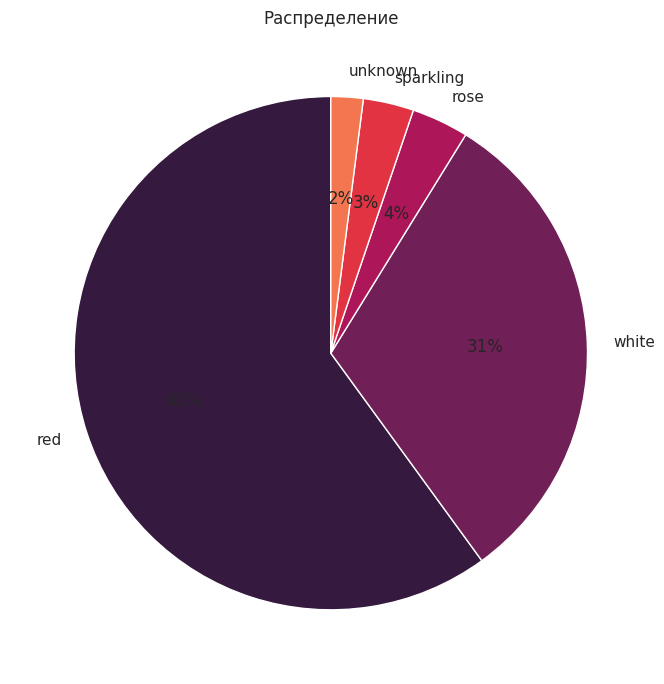

In [23]:
df['color'].value_counts().plot(
    kind='pie', figsize=[7, 7], 
    autopct='%.0f%%',
    counterclock=True, startangle=90)
plt.title('Распределение', fontsize=12)
plt.ylabel('')
plt.tight_layout() 
plt.show()

* Топ-10 сортов винограда по цвету вина

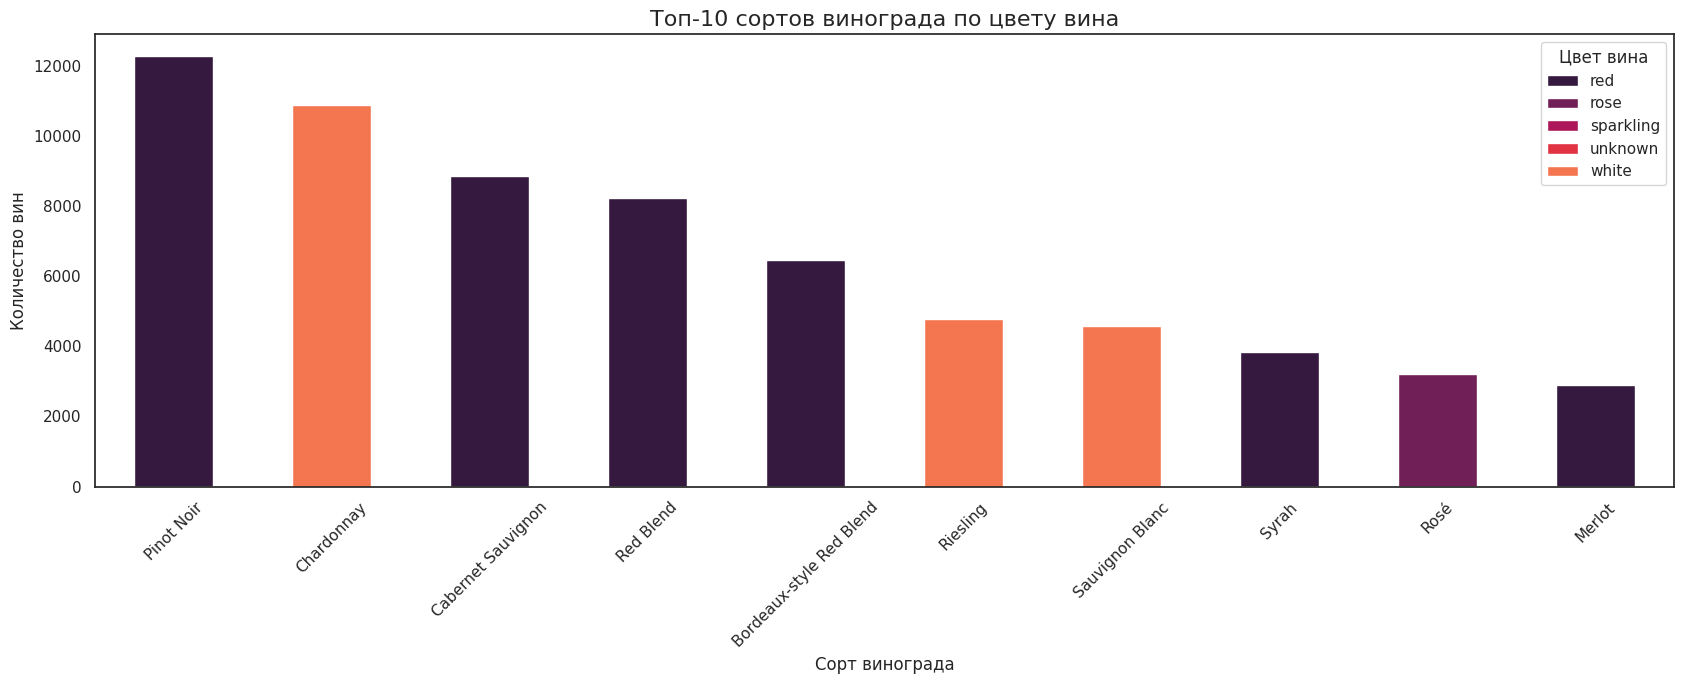

In [24]:
top_varieties = df['variety'].value_counts().head(10).index

df_top = df[df['variety'].isin(top_varieties)].copy()
df_top['variety'] = df_top['variety'].astype(str)
variety_color_counts = df_top.groupby(['variety','color']).size().unstack(fill_value=0)

variety_color_counts = variety_color_counts.loc[variety_color_counts.sum(axis=1).sort_values(ascending=False).index]

variety_color_counts.plot(kind='bar', stacked=True, figsize=(17, 7))

plt.title('Топ-10 сортов винограда по цвету вина', fontsize=16)
plt.xlabel('Сорт винограда', fontsize=12)
plt.ylabel('Количество вин', fontsize=12)
plt.legend(title='Цвет вина')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Топ-10 самых попурярных сортов по провинциям

In [25]:
df.groupby('province').variety.apply(lambda x: x.value_counts()).sort_values(
    axis=0, ascending=False).to_frame().head(10)

variety
province                                    
California Pinot Noir                   6418
           Cabernet Sauvignon           5328
           Chardonnay                   4784
Bordeaux   Bordeaux-style Red Blend     4336
Oregon     Pinot Noir                   2560
Piedmont   Nebbiolo                     2478
California Zinfandel                    2458
Burgundy   Chardonnay                   2130
Tuscany    Red Blend                    1988
           Sangiovese                   1949

* Ключевые выводы по разделу "Сорта и типы вин"

In [26]:
print(f'• Сортовое разнообразие: {df["variety"].nunique()} уникальных сортов')
print(f'• Концентрация: топ-5 сортов покрывают {(variety_stats.sum()/len(df))*100:.1f}% рынка')

• Сортовое разнообразие: 701 уникальных сортов
• Концентрация: топ-5 сортов покрывают 38.9% рынка


* Цветовое распределение: красные вина доминируют на рынке - 4 из 5 топ-сортов красные
* Региональная специализация: Калифорния лидирует по производству ключевых сортов (Pinot Noir, Cabernet Sauvignon, Chardonnay)
* Французские: Bordeaux и Burgundy сохраняют эталонные позиции для классических сортов
* Ценовой разброс: Bordeaux-style Red Blend показывает наибольшую дисперсию цен (медиана 23 у.е. vs среднее 42 у.е.)
* Качество-цена: Pinot Noir демонстрирует лучший баланс с высоким рейтингом при умеренной цене
* Американское доминирование: California представляет больше вин топ-сортов, чем любой европейский регион
* Красные вина составляют основу мирового виноделия
* Ценовая политика сильно варьируется даже внутри одного сорта

## 4. Анализ возрастных характеристик вина

### 4.1 Общая статистика по возрасту

In [27]:
print(f'Всего вин с известным возрастом: {df['wine_age'].notna().sum():,}')
print(f'Средний возраст: {df['wine_age'].mean():.1f} лет')
print(f'Медианный возраст: {df['wine_age'].median():.1f} лет')
print(f'Самый молодой: {df['wine_age'].min():.0f} лет')
print(f'Самый старый: {df['wine_age'].max():.0f} лет')

Всего вин с известным возрастом: 115,645
Средний возраст: 6.4 лет
Медианный возраст: 6.0 лет
Самый молодой: 0 лет
Самый старый: 113 лет


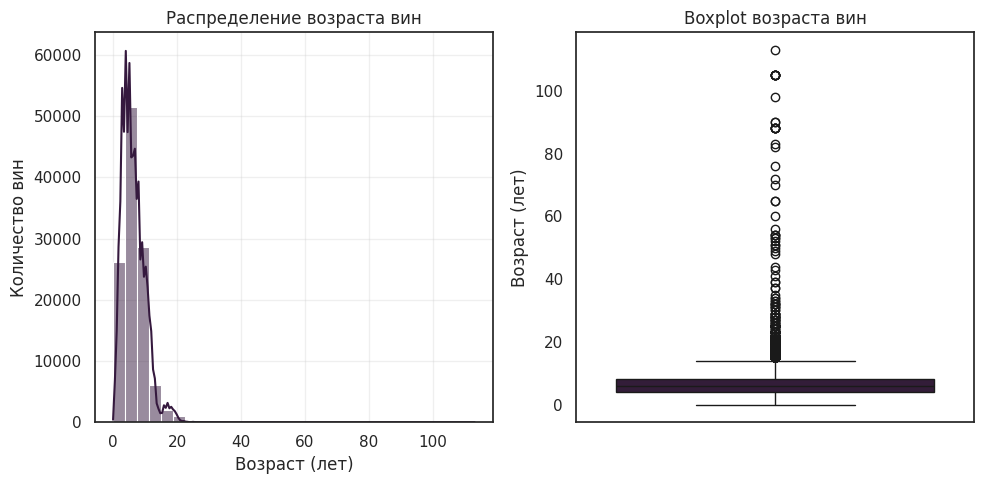

In [28]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['wine_age'].dropna(), bins=30, kde=True)
plt.title('Распределение возраста вин')
plt.xlabel('Возраст (лет)')
plt.ylabel('Количество вин')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
sns.boxplot(y=df['wine_age'])
plt.title('Boxplot возраста вин')
plt.ylabel('Возраст (лет)')

plt.tight_layout()
plt.show()


### 4.2 Анализ распределений (асимметрия - skewness и эксцесс - kurtosis)

In [29]:
age_skew = df['wine_age'].skew()
age_kurt = df['wine_age'].kurtosis()
analyze_distribution(df,'wine_age','возраста')

📊 Анализ распределения возраста: 
Асимметрия: 3.44 
Эксцесс: 57.67
 
🎯 Асимметрия: очень сильная правая 
   • Распределение сильно смещено влево 
   • Подавляющее большинство значений сосредоточено в начале диапазона 
   • Длинный хвост экстремально высоких значений 
   • Среднее значение значительно выше медианы 
🎯 Эксцесс: очень высокий (экстремально лептокуртическое) 
   • Очень острый пик и чрезвычайно тяжелые хвосты 
   • Огромное количество экстремальных выбросов 
   • Данные сильно сконцентрированы вокруг среднего 
   • Высокий риск непредсказуемых экстремальных значений 

💡 Комбинированная интерпретация: 
• 📈 Распределение: сильно асимметричное с тяжелыми хвостами 
• 🎯 Данные поляризованы: много низких + много высоких значений 
• ⚠️ Среднее значение ненадежно - используйте медиану 
• 📊 Высокий риск экстремальных значений 

📊 Числовые характеристики: 
• Медиана (median): 6.00 
• Среднее (mean): 6.43 
• Разница (mean - median): 0.43 
• Стандартное отклонение (std): 3.85 
• Коэффи

### 4.3 Распределение данных по возрастным категориям

In [30]:
age_stats = df['age_category'].value_counts().sort_index()
for category, count in age_stats.items():
    percentage = (count / len(df)) * 100
    print(f'- {category}: {count:,} вин ({percentage:.2f}%)')

- Антиквар: 34 вин (0.03%)
- Винтаж: 203 вин (0.17%)
- Выдержанное: 74,539 вин (62.15%)
- Зрелое: 14,623 вин (12.19%)
- Молодое: 26,235 вин (21.88%)


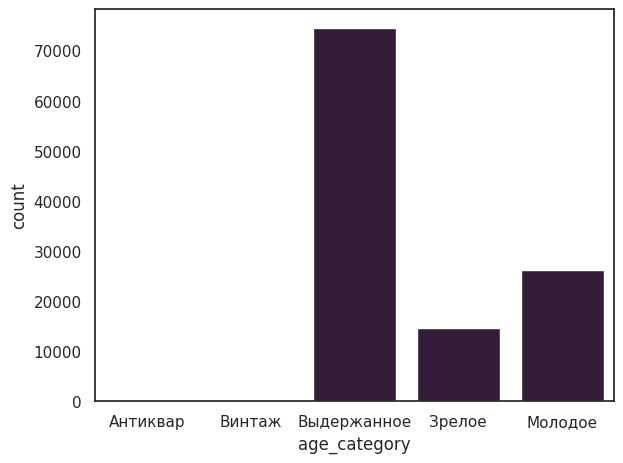

In [31]:
sns.countplot(data=df, x='age_category')
plt.tight_layout()
plt.show()

* Разбивка количества записей по декадам

In [32]:
df['decade'] = (df['year'] // 10) * 10
df.groupby('decade').agg({
   'price': ['mean','median','count'],
   'points':'mean',
   'wine_age':'mean'
}).round(2).sort_index()

price               points wine_age
          mean median  count   mean     mean
decade                                      
1900     40.00   40.0      1  91.00    113.0
1910     19.12   22.0      8  89.88   104.12
1920     21.75   22.5      8  88.12     88.5
1930    737.50  737.5      2  93.50     82.5
1940    459.33  350.0      3  93.67    72.67
1950    429.67  415.0      3  95.33    63.33
1960    335.67  300.0     12  94.17    52.08
1970    164.20  175.0      5  90.80     41.2
1980    112.33   95.0     27  90.81     31.0
1990     36.78   25.0   1658  87.99    19.13
2000     38.33   28.0  36165  88.24    10.15
2010     33.78   25.0  77753  88.60     4.38

### 4.4 Выводы по разделу "Анализ возрастных характеристик вина"

#### 📋 Интерпретация возрастного распределения

* 🎯 **Выдержанные вина доминируют**: 62.2% рынка (3-10 лет)  
Выдержанные вина составляют абсолютное большинство на рынке, что свидетельствует о предпочтении потребителей вин оптимального возраста. Этот сегмент представляет собой баланс между ценой и качеством, предлагая оптимальные питьевые характеристики для большинства потребителей.

* 📈 **Молодые вина**: 21.9% (до 3 лет)  
Молодые вина занимают значительную долю рынка, что указывает на их популярность для ежедневного потребления. Этот сегмент характеризуется быстрым оборотом на рынке и доступностью для широкого круга потребителей.

* 🏺 **Зрелые вина**: 12.2% (10-20 лет)  
Зрелые вина представляют нишевый премиальный сегмент, состоящий преимущественно из коллекционных экземпляров. Несмотря на относительно небольшую долю, этот сегмент важен с точки зрения премиализации и формирования имиджа производителей.

* 🏛️ **Винтаж и антиквар**: 0.2% (20+ лет)  
Эксклюзивные коллекционные вина составляют крайне малую долю рынка, что подчеркивает их редкость и особый статус. Эти вина представляют интерес прежде всего для коллекционеров и ценителей.

#### 🎯 Ключевые выводы по возрастным характеристикам

* 📈 **Статистические закономерности**  
Распределение возраста демонстрирует **сильную правую асимметрию**, где большинство вин являются молодыми (медиана: 6 лет), при этом присутствует длинный хвост старых коллекционных вин. Такое распределение типично для потребительских рынков, где преобладают товары массового спроса.

* 🏷️ **Рыночная сегментация**  
**Массовый сегмент (84.1%)** объединяет молодые и выдержанные вина, характеризующиеся быстрым оборотом и доступными ценами.  
**Премиум сегмент (12.4%)** состоит из зрелых вин коллекционного характера с более высокими ценами.  
**Эксклюзивный сегмент (0.2%)** представлен винтажными и антикварными винами - редкими коллекционными экземплярами.  

* 💡 **Практические инсайты**  
Рынок в значительной степени ориентирован на вина до 10 лет, что отражает потребительские предпочтения и экономическую целесообразность. Старые вина формируют нишевый коллекционный сегмент с особыми характеристиками спроса. Возраст слабо коррелирует с ценой для массового сегмента, что указывает на важность других факторов (сорт, регион, рейтинг) в ценообразовании.

## 5. Сегментация цен на вино

### 5.1 Базовый анализ распределения

In [33]:
df.price.describe()

count    119928.000000
mean         35.215521
std          40.840919
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

In [34]:
print(f'• Средняя цена: {df['price'].mean():.1f} у.е. (медиана: {df['price'].median():.1f} у.е.) → сильный перекос вправо')
print(f'• 50% вин стоят до {df['price'].median():.0f} у.е.')
print(f'• 75% вин стоят до {df['price'].quantile(0.75):.0f} у.е.') 
print(f'• Разброс цен огромен: от {df['price'].min():.0f} у.е. до {df['price'].max():.0f} у.е.')
print(f'• Стандартное отклонение {df['price'].std():.1f} > среднего значения → высокая вариативность')

• Средняя цена: 35.2 у.е. (медиана: 25.0 у.е.) → сильный перекос вправо
• 50% вин стоят до 25 у.е.
• 75% вин стоят до 42 у.е.
• Разброс цен огромен: от 4 у.е. до 3300 у.е.
• Стандартное отклонение 40.8 > среднего значения → высокая вариативность


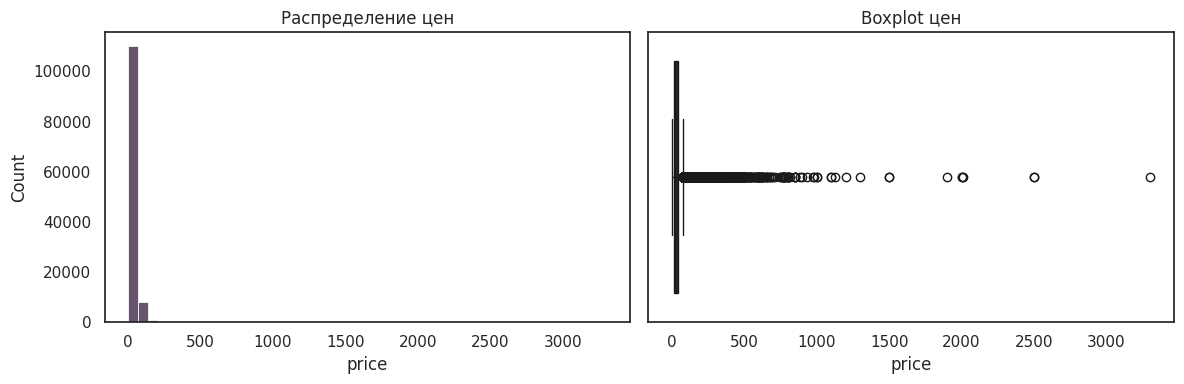

In [35]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=50)
plt.title('Распределение цен')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['price'])
plt.title('Boxplot цен')
plt.tight_layout()
plt.show()

* Анализ экстремальных значений

In [36]:
print(f'• 95-й перцентиль: у.е.{df['price'].quantile(0.95):.0f}')
print(f'• 99-й перцентиль: у.е.{df['price'].quantile(0.99):.0f}')
print(f'• Вин дороже у.е.100: {(df['price'] > 100).sum()} ({(df['price'] > 100).sum()/len(df)*100:.1f}%)')
print(f'• Вин дороже у.е.500: {(df['price'] > 500).sum()} ({(df['price'] > 500).sum()/len(df)*100:.1f}%)')

• 95-й перцентиль: у.е.82
• 99-й перцентиль: у.е.150
• Вин дороже у.е.100: 3234 (2.7%)
• Вин дороже у.е.500: 91 (0.1%)


Для такой выраженной ассиметрии данных использую подходы:

- **Сегментация**: на основе исходных цен для бизнес-интерпретации
- **Визуализация**: цены с логарифмированием для лучшего отображения паттернов

### 5.2 Метод сегментации цен

**Гибридный подход, сочетающий статистические и бизнес-ориентированные границы:**

- **Статистические сегменты** (по квартилям):
  - Бюджет (0-17 у.е.) - 25% самых дешевых вин
  - Средний- (17-25 у.е.) - следующие 25%  
  - Средний+ (25-42 у.е.) - следующие 25%

- **Бизнес-сегменты** (ручные границы):
  - Премиум (42-75 у.е.) - охватывает до 87-го перцентиля
  - Люкс (76-150) - премиальный сегмент
  - Ультра-люкс (150-3300) - эксклюзивные вина

In [37]:
df['price_segment'] = pd.cut(df['price'], 
                           bins=[0, 17, 25, 42, 76, 150, df['price'].max()],
                           labels=['Бюджет','Средний-','Средний+','Премиум','Люкс','Ультра-люкс'])

segment_stats = df.groupby('price_segment').agg({
   'price': ['count','mean','min','max']
}).round(2)
segment_stats

price                       
               count    mean    min     max
price_segment                              
Бюджет         30689   13.24    4.0    17.0
Средний-       30574   21.36   17.5    25.0
Средний+       29501   33.46   25.5    42.0
Премиум        22001   55.84   42.5    76.0
Люкс            5971  100.84   77.0   150.0
Ультра-люкс     1192  290.42  151.0  3300.0

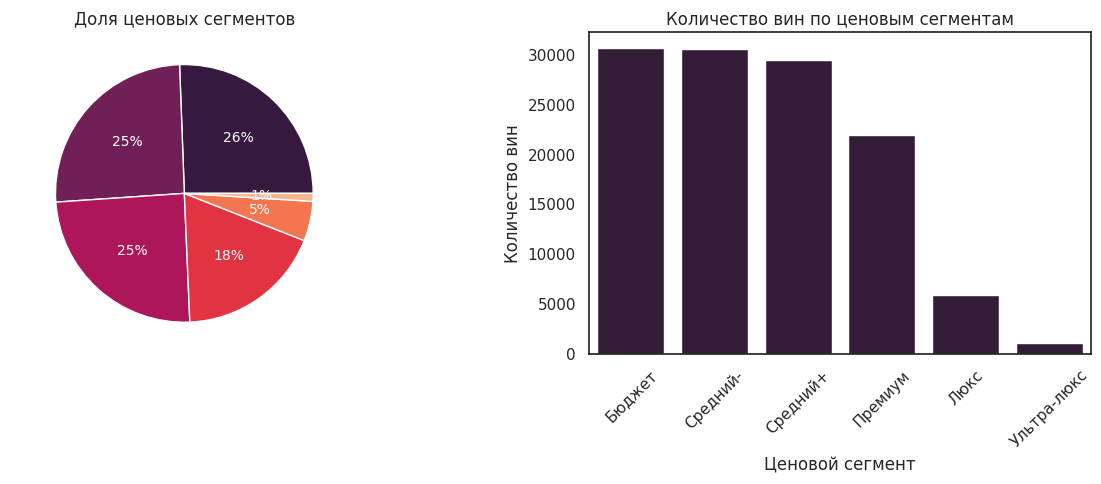

In [38]:
segment_counts = df['price_segment'].value_counts()
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
segment_counts = df['price_segment'].value_counts()
plt.pie(
    segment_counts.values, 
    labels=segment_counts.index, 
    autopct='%1.0f%%', 
    textprops={'color':'white','fontsize': 10})
plt.title('Доля ценовых сегментов')

plt.subplot(1, 2, 2)
sns.barplot(x=segment_counts.index, y=segment_counts.values)
plt.title('Количество вин по ценовым сегментам')
plt.xlabel('Ценовой сегмент')
plt.ylabel('Количество вин')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 5.3 Визуализация (логарифмированные цены)

**Перевод логарифмированной шкалы:**
- log_price = 3.0 → 20 у.е.
- log_price = 4.0 → 55 у.е.  
- log_price = 5.0 → 150 у.е.
- Разница в 1 единицу = цена отличается в ~2.7 раза

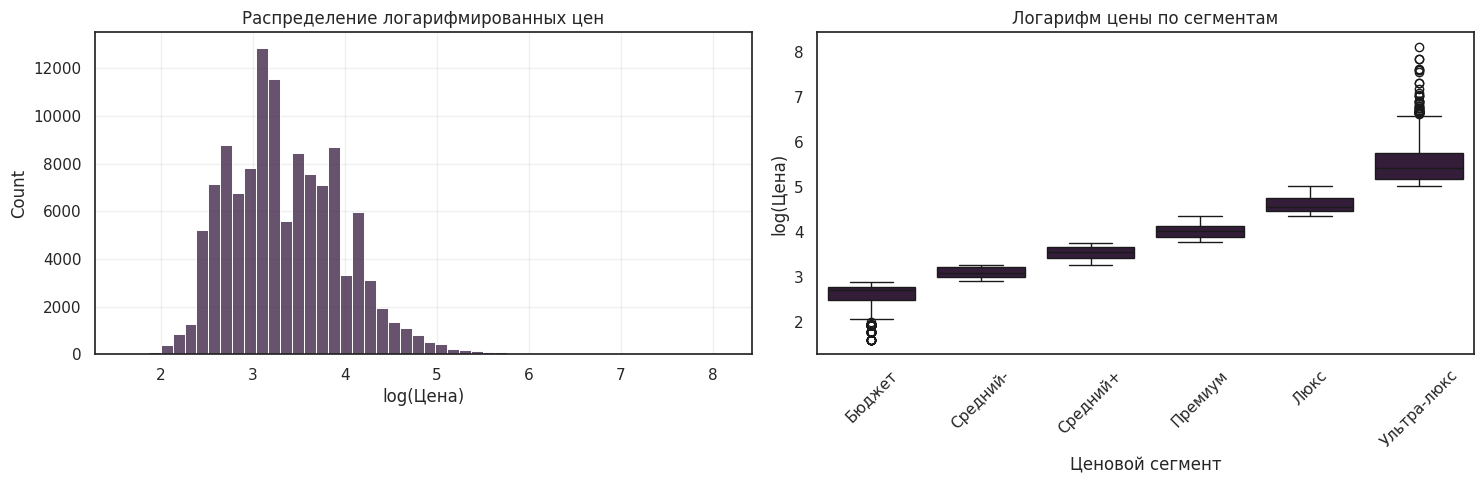

In [39]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['log_price'], bins=50)
plt.title('Распределение логарифмированных цен')
plt.xlabel('log(Цена)')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='price_segment', y='log_price')
plt.title('Логарифм цены по сегментам')
plt.xlabel('Ценовой сегмент')
plt.ylabel('log(Цена)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### 5.4 Выводы по разделу "Сегментация цен на вино"

#### Распределение цен
- Наблюдается сильная правая асимметрия в распределении цен
- Средняя цена значительно превышает медиану (медиана: 25 у.е.), что указывает на влияние небольшого количества дорогих вин на среднее значение
- 75% всех вин стоят до 42 у.е., что демонстрирует концентрацию рынка в бюджетном и среднем сегментах
- Разброс цен чрезвычайно широк - от минимальных значений до 3300 у.е.

#### Ценовые сегменты
- **Массовый сегмент доминирует**: 75% вин сосредоточены в трех сегментах (бюджет, средний-, средний+), примерно по 25% в каждом
- **Бюджетный сегмент** (0-17 у.е.) - базовый уровень рынка, наиболее доступные вина
- **Средний сегмент** (17-42 у.е.) - охватывает 50% рынка, основной драйвер объемов продаж
- **Премиум и выше** (от 42 у.е.) - занимает около 25% рынка, при этом сегменты люкс и ультра-люкс составляют менее 5% от общего количества

#### Экстремальные значения
- Всего 5% вин стоят дороже 100 у.е.
- Вин дороже 500 у.е. - менее 1% от общего количества
- Высокая вариативность цен (стандартное отклонение превышает среднее значение) указывает на сильно сегментированный рынок

Рынок характеризуется высокой концентрацией в среднем ценовом сегменте, что типично для потребительских товаров, с длинным 'хвостом' эксклюзивных премиальных продуктов.

## 6. Обзоры, эксперты и рейтинги

### 6.1 `description` - описания вин 

 * Популярные слова в описаниях вин

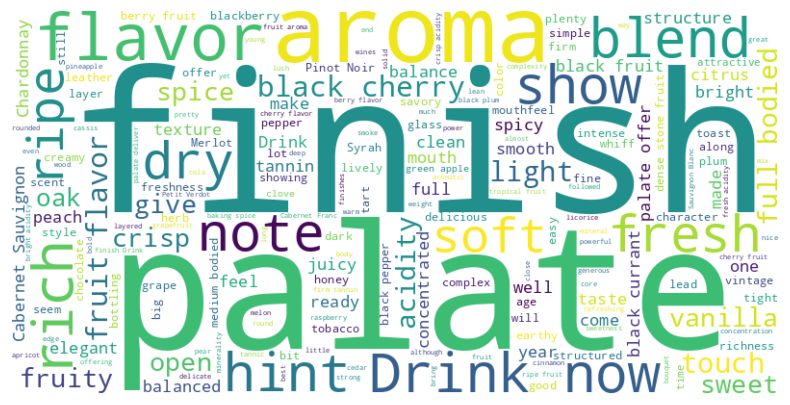

In [40]:
wine_stopwords = {
   'Wine','Vineyards','Vineyard','Estate','Reserve','Cellars', 
   'Winery','Family','Series','Selection','Private','Limited',
   'Special','Grand','Old','New','French','American','California',
   'Organic','Biodynamic','Natural','Red','White','Rose','Sparkling','nose'
}

stopwords = set(STOPWORDS)
stopwords.update(wine_stopwords)

text =''.join(df['description'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      stopwords=stopwords).generate(text)

plt.figure(figsize=(12, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

* Самое короткое описание

In [41]:
df['desc_length'] = df['description'].str.len()

shortest_idx = df['desc_length'].idxmin()
shortest = df.loc[shortest_idx]
print(f'Длина: {shortest['desc_length']} символов')
print(f'Рейтинг: {shortest['points']}')
print(f'Цена: {shortest['price']} у.е.')
print(f'Сорт: {shortest['variety']}')
print(f'Описание: {shortest['description']}')

Длина: 20 символов
Рейтинг: 88
Цена: 24.0 у.е.
Сорт: Chardonnay
Описание: Imported by Kobrand.


* Самое длинное описание

In [42]:
longest_idx = df['desc_length'].idxmax()
longest = df.loc[longest_idx]
print(f'Длина: {longest['desc_length']} символов')
print(f'Рейтинг: {shortest['points']}')
print(f'Цена: {longest['price']} у.е.')
print(f'Сорт: {longest['variety']}')
print(f'Описание: {longest['description']}')  

Длина: 829 символов
Рейтинг: 88
Цена: 45.0 у.е.
Сорт: Red Blend
Описание: Dark, dusty, strongly scented with barrel toast, coffee grounds and incense, this is the most substantial and complete version to date. Balancing cherry and plum fruit against the pretty barrel-infused tannins, it glides gracefully across the palate into a seamless finish.   Saggi is the Long Shadows collaboration with Tuscany's Ambrogio and Giovanni Folonari. the blend in 2007 is 43% Sangiovese, 36% Cabernet Sauvignon and 21% Syrah. With each new vintage, the percentage of Sangiovese climbs, putting more Tuscany in this new world super-Tuscan wine. Dark, dusty, strongly scented with barrel toast, coffee grounds and incense, this is the most substantial and complete version to date. Balancing cherry and plum fruit against the pretty barrel-infused tannins, it glides gracefully across the palate into a seamless finish.


In [43]:
print(f'• Средняя длина: {df['desc_length'].mean():.0f} символов')
print(f'• Медианная длина: {df['desc_length'].median():.0f} символов')

• Средняя длина: 243 символов
• Медианная длина: 237 символов


* Анализ тональности (sentiment) по ценовым сегментам

In [ ]:
df['sentiment'] = df['description'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

expensive_sentiment = df[df['price'] > df['price'].quantile(0.8)]['sentiment'].mean()
cheap_sentiment = df[df['price'] < df['price'].quantile(0.2)]['sentiment'].mean()

print(f'Тональность дорогих вин: {expensive_sentiment:.2f}')
print(f'Тональность дешевых вин: {cheap_sentiment:.2f}')

Дешевые вина имеют чуть более позитивные описания, чем дорогие. Возможно дорогие вина описывают более сдержанно, а дешёвые приукрашивают.  
Выраженных отличий нет.

* Визуализация распределения тональности  
Интерпретация:
    * \> 0.2 - явно позитивный тон
    * 0.05 - 0.2 - слабо позитивный тон
    * -0.05 - 0.05 - нейтральный тон
    * < -0.05 - негативный тон

In [ ]:
plt.figure(figsize=(10, 6))
df[df['price'] > df['price'].quantile(0.8)]['sentiment'].hist(alpha=0.7, label='Дорогие вина', bins=20)
df[df['price'] < df['price'].quantile(0.2)]['sentiment'].hist(alpha=0.7, label='Дешевые вина', bins=20)
plt.xlabel('Тональность описания')
plt.ylabel('Количество вин')
plt.legend()
plt.title('Распределение тональности описаний по ценовым сегментам')
plt.show()

In [ ]:
print('Статистика тональности по всем винам:')
print(f'Средняя тональность: {df['sentiment'].mean():.3f}')
print(f'Стандартное отклонение: {df['sentiment'].std():.3f}')
print(f'Минимум: {df['sentiment'].min():.3f}')
print(f'Максимум: {df['sentiment'].max():.3f}')

Большинство описаний находятся в положительной зоне.  
Стандартное отклонение 0.170 - относительно небольшой разброс. Описания написаны в схожем стиле, нет резких контрастов.

In [ ]:
most_positive_idx = df['sentiment'].idxmax()
most_positive = df.loc[most_positive_idx]
print('-' * 80)
print('🎉 САМОЕ ПОЗИТИВНОЕ ОПИСАНИЕ:')
print(f'Тональность: {most_positive['sentiment']:.3f}')
print(f'Рейтинг: {shortest['points']}')
print(f'Цена: {most_positive['price']} у.е.')
print(f'Сорт: {most_positive['variety']}')
print(f'Описание: {most_positive['description']}')
print('-' * 80)

most_negative_idx = df['sentiment'].idxmin()
most_negative = df.loc[most_negative_idx]
print('😞 САМОЕ НЕГАТИВНОЕ ОПИСАНИЕ:')
print(f'Тональность: {most_negative['sentiment']:.3f}')
print(f'Рейтинг: {shortest['points']}')
print(f'Цена: {most_negative['price']} у.е.')
print(f'Сорт: {most_negative['variety']}')
print(f'Описание: {most_negative['description']}')
print('-' * 80)

Вероятно TextBlob плохо работает с винными терминами на английском.  
Слова'soy' (соя),'cedar' (кедр),'smoked meat' (копченое мясо),'mocha' (мокко),'acidity' (кислотность) алгоритм воспринимает как негативные.  
В контексте вин эти термины нейтральны или даже позитивны - они описывают сложный букет.

* Статистика по ключевым вкусовым профилям вин

In [ ]:
taste_words = ['fruity','oaky','spicy','herbal','mineral','earthy', 
              'citrus','berry','chocolate','vanilla','caramel']

results = []
total_wines = len(df['description'].dropna())

for word in taste_words:
    count = df['description'].str.contains(word, case=False, na=False).sum()
    percentage = (count / total_wines) * 100
    results.append((word, count, percentage))

results.sort(key=lambda x: x[1], reverse=True)

for word, count, percentage in results:
    print(f' {word:<10} {count:>5} раз ({percentage:>.1f}%)')

### 6.2 `taster_name`, `taster_twitter_handle` - авторы обзоров 

* Статистика по обзорам

In [ ]:
print(f'- Всего обзоров: {len(df):,}')
print(f'- Обзоров с указанием эксперта: {df['taster_name'].notna().sum():,} ({df['taster_name'].notna().mean()*100:.1f}%)')
print(f'- Обзоров с Twitter эксперта: {df['taster_twitter_handle'].notna().sum():,} ({df['taster_twitter_handle'].notna().mean()*100:.1f}%)')

* Распределение обзоров по экспертам

In [ ]:
top_tasters = df['taster_name'].value_counts().head()
print('🏆 Самые продуктивные эксперты:')
for taster, count in top_tasters.items():
    print(f'  {taster}: {count:,} обзоров')

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, 
              x='taster_name',
              order=df['taster_name'].value_counts().head(10).index)
plt.title('Топ-10 экспертов по количеству обзоров')
plt.xlabel('Количество обзоров')
plt.ylabel('Эксперт')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [ ]:
print(f'Записей с Twitter, но без имени эксперта: {len(df[df['taster_twitter_handle'].notna() & df['taster_name'].isna()])}')
print(f'\nЗаписей с именем эксперта, но без Twitter: {len(df[df['taster_name'].notna() & df['taster_twitter_handle'].isna()])}')

* Самые активные эксперты с Twitter

In [ ]:
twitter_stats = df.groupby(['taster_name','taster_twitter_handle']).size().reset_index(name='mentions')
twitter_stats = twitter_stats.sort_values('mentions', ascending=False).head(10)

for i, (_, row) in enumerate(twitter_stats.iterrows(), 1):
    print(f'{i:2}. {row['taster_name']:20} {row['taster_twitter_handle']:20} {row['mentions']:4} упоминаний')

* Средняя цена вин по экспертам

In [ ]:
expert_price_preference = df.groupby('taster_name')['price'].agg(['mean','median','count'])
expert_price_preference

In [ ]:
plt.figure(figsize=(12, 6))

sns.histplot(data=expert_price_preference, x='mean', kde=True)
plt.title('Распределение средних цен по экспертам')

plt.tight_layout()
plt.show()

Нет специализации по цене - каждый эксперт оценивает вина разных ценовых категорий, нет явного смещения в дорогой/дешевый сегмент

* Pазброс цен у каждого эксперта

In [ ]:
expert_price_range = df.groupby('taster_name')['price'].agg(['min','max','std'])
print('Разброс цен по экспертам:')
print(expert_price_range.sort_values('std', ascending=False))

* Cтрогие/лояльные эксперты (анализ стиля оценивания)

In [ ]:
expert_range = df.groupby('taster_name')['points'].agg(['min','max','std'])
print(expert_range.sort_values('std', ascending=False))

In [ ]:
min_max_points = expert_range['max'].min()
print(f'Самый низкий "высокий" балл: {min_max_points}')

experts_with_min_max = expert_range[expert_range['max'] == min_max_points]
print('Эксперты:')
print(experts_with_min_max.index.tolist())

In [ ]:
print('Эксперты, выставлявшие 100 баллов:')
print(df[df['points'] == 100]['taster_name'].value_counts())

* Корреляция оценок экспертов, которые оценивали одни и те же вина

In [ ]:
multi_expert = df.groupby('title').filter(lambda x: x['taster_name'].nunique() > 1)
print(f'Вин с несколькими экспертами: {multi_expert['title'].nunique()}')

In [ ]:
expert_ratings = multi_expert.pivot_table(index='title', 
                               columns='taster_name', 
                               values='points', 
                               aggfunc='mean')
correlation_matrix = expert_ratings.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            center=0,
            square=True)
plt.title('Корреляция оценок между экспертами', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
corr_pairs = correlation_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

unique_pairs = {}
for pair, corr_value in corr_pairs.items():
    if pd.notna(corr_value): 
        expert1, expert2 = pair
        sorted_pair = tuple(sorted([expert1, expert2]))
        if sorted_pair not in unique_pairs:
            unique_pairs[sorted_pair] = corr_value

unique_corr_series = pd.Series(unique_pairs)

print(f'📈 ОБЩАЯ СТАТИСТИКА:')
print(f'Уникальных пар экспертов: {len(unique_corr_series)}')
print(f'Средняя корреляция: {unique_corr_series.mean():.3f}')
print(f'Медианная корреляция: {unique_corr_series.median():.3f}')
print(f'Количество сильных связей (>0.7): {(unique_corr_series > 0.7).sum()}')
print(f'Количество слабых связей (<0.3): {(unique_corr_series < 0.3).sum()}')

print(f'\n🎯 ВСЕ ПАРЫ ЭКСПЕРТОВ (отсортировано по силе корреляции):')
sorted_pairs = unique_corr_series.sort_values(ascending=False)

for pair, corr_value in sorted_pairs.items():
    expert1, expert2 = pair
    
    if corr_value > 0.7:
        strength ='очень сильная'
    elif corr_value > 0.5:
        strength ='сильная'
    elif corr_value > 0.3:
        strength ='умеренная' 
    elif corr_value > 0.1:
        strength ='слабая'
    elif corr_value > -0.1:
        strength ='очень слабая'
    elif corr_value > -0.3:
        strength ='слабая отрицательная'
    else:
        strength ='умеренная отрицательная'
    
    print(f'• {expert1:20} + {expert2:20}: {corr_value:5.2f} - {strength}')

* Предпочтения по цветам

In [ ]:
expert_color = pd.crosstab(df['taster_name'], df['color'])
expert_color

In [ ]:
expert_color_pct = expert_color.div(expert_color.sum(axis=1), axis=0)

expert_color_pct.plot(kind='bar', 
                      stacked=True, 
                      figsize=(12, 6))

plt.title('Цветовые предпочтения экспертов', fontsize=16)
plt.xlabel('Эксперт')
plt.ylabel('Доля оценок')
plt.legend(title='Цвет вина', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Специализация экспертов по странам (топ-15 стран по количеству оценок)

In [ ]:
expert_country = pd.crosstab(df['taster_name'], df['country'])

top_countries = df['country'].value_counts().head(15).index
expert_country = expert_country[top_countries]

# Строим heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(expert_country, 
            annot=True, 
            fmt='d',
            cmap='YlOrRd',
            linewidths=0.5,
            cbar_kws={'label':'Количество оценок'})

plt.title('Специализация экспертов по странам', fontsize=16, pad=20)
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Эксперт', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 6.3 `points` оценки вин

In [ ]:
df.points.describe()

In [ ]:
print(f'• Средний рейтинг: {df['points'].mean():.1f} баллов (медиана: {df['points'].median():.1f} баллов)')
print(f'• 50% вин имеют рейтинг до {df['points'].median():.0f} баллов')
print(f'• 75% вин имеют рейтинг до {df['points'].quantile(0.75):.0f} баллов') 
print(f'• Разброс рейтингов: от {df['points'].min():.0f} до {df['points'].max():.0f} баллов')
print(f'• Стандартное отклонение {df['points'].std():.1f} баллов → {'высокая' if df['points'].std() > df['points'].mean() * 0.3 else'умеренная'} вариативность')

In [ ]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 10))

sns.histplot(data=df, x='points', bins=21, kde=True, ax=ax1)
ax1.axvline(df['points'].median(), color='green', linestyle='--', label=f'Медиана: {df['points'].median():.1f}')
ax1.set_xlabel('Рейтинг (баллы)')
ax1.set_ylabel('Количество вин')
ax1.set_title('Распределение рейтингов вин')
ax1.legend()

sns.boxplot(data=df, x='points', ax=ax2)
ax2.set_xlabel('Рейтинг (баллы)')
ax2.set_title('Boxplot рейтингов')

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='points', order=sorted(df['points'].unique()))
plt.title('Распределение рейтингов вин', fontsize=16)
plt.xlabel('Рейтинг (баллы)')
plt.ylabel('Количество вин')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 6.4 Выводы по разделу "Обзоры, эксперты и рейтинги"

#### Анализ текстовых описаний
- **Облако слов** демонстрирует преобладание сенсорных характеристик: 'flavor', 'aroma', 'fruit', 'finish', 'acidity', 'tannins' - что отражает профессиональный подход к описанию вин
- **Длина описаний** варьируется значительно: от кратких формулировок до развернутых характеристик
- **Тональность описаний** в целом положительная, со средним значением 0.17-0.18, что указывает на позитивный характер большинства обзоров

#### Особенности тональности
- Дешевые вина имеют слегка более позитивные описания (+0.181 против +0.170 у дорогих вин)
- TextBlob демонстрирует ограничения в анализе винной терминологии, воспринимая профессиональные дескрипторы ('soy', 'cedar', 'acidity') как негативные
- Стандартное отклонение тональности 0.170 указывает на относительно однородный стиль описаний

#### Вкусовые профили
**Топ-3 самых частых дескрипторов:**
- **berry** (31.9%) - каждое третье вино
- **citrus** (9.5%) - каждое десятое вино  
- **mineral** (8.6%) - выраженная минеральность

**Популярные сладкие ноты:**
- vanilla (8.2%)
- chocolate (6.6%)
- caramel (2.3%)

**Специфические характеристики:**
- spicy (5.4%) - пряные оттенки
- herbal (4.3%) - травянистые ноты
- earthy (3.8%) - землистые тона
- oaky (2.1%) - дубовая выдержка

Фруктово-ягодный профиль доминирует в описаниях  
Сладкие акценты (ваниль, шоколад) значительно популярнее терпких (дуб, землистость)

#### Экспертное сообщество
- **Охват данных**: 82.3% обзоров имеют указание эксперта, 79.8% - ссылку на Twitter
- **Продуктивность**: выделяются 5 основных экспертов, составляющих ядро рецензентов
- **Специализация**: эксперты охватывают широкий ценовой диапазон без выраженной специализации на определенных сегментах

#### Стили оценивания
- **Диапазоны оценок**: большинство экспертов используют широкий диапазон (80-100 баллов), некоторые работают в узком коридоре
- **Строгость оценивания**: минимальный 'высокий' балл составляет 91, что указывает на общую высокую планку оценок

#### Профессиональные предпочтения
- **Цветовые приоритеты**: у большинства экспертов преобладают оценки красных вин (60-80%), за исключением специалистов по белым винам
- **Географическая специализация**: четко прослеживается распределение по странам - эксперты фокусируются на определенных винодельческих регионах

#### Распределение рейтингов
- **Высокие стандарты**: средний рейтинг 88.3 балла при медиане 88 указывает на смещение в сторону высоких оценок
- **Ограниченный диапазон**: 75% вин получают 90 баллов и ниже, при этом минимальная оценка составляет 80 баллов
- **Умеренная вариативность**: стандартное отклонение 3.0 балла свидетельствует о консервативном подходе к оцениванию

#### Ключевые инсайты
1. **Профессиональный консенсус**: несмотря на субъективность, эксперты демонстрируют умеренную согласованность в оценках
2. **Специализация**: четкое разделение по географическим регионам и типам вин
3. **Высокие стандарты**: рейтинговая система смещена в сторону положительных оценок, что типично для профессиональных публикаций
4. **Текстовые паттерны**: стандартизированный подход к описаниям с акцентом на сенсорные характеристики

## 7. Влияние рейтинга вина на его цену.

### 7.1 Общий анализ взаимосвязи

In [ ]:
df.groupby('price_segment')['points'].agg(['mean','median','std'])

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='price_segment', y='points')
plt.title('Распределение рейтингов по ценовым сегментам')
plt.xlabel('Ценовой сегмент')
plt.ylabel('Рейтинг')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 7.2 Диаграмма рассеяния - исходные данные

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.regplot(x='price', y='points', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.xlabel('Стоимость (у.е.)', fontsize=12)
plt.ylabel('Рейтинг', fontsize=12)
plt.title('Зависимость рейтинга от цены (все данные)', fontsize=14)
plt.grid(alpha=0.3)

Не визуалирируется значимая закономерность между ценой и рейтингом

In [ ]:
print(f'• Корреляция (исходные данные): {df['price'].corr(df['points'])}')
print(f'• Корреляция (логарифм цены): {df['log_price'].corr(df['points'])}')

* Логарифмирование увеличивает корреляцию с 0.404 до 0.595
* Это улучшение на 47% относительно исходных данных
* Корреляция переходит из 'слабой' в 'умеренную' категорию
* Модель с логарифмом объясняет 35% вариации рейтинга против 16% в исходной

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.regplot(x='log_price', y='points', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.xlabel('Стоимость (у.е.)', fontsize=12)
plt.ylabel('Рейтинг', fontsize=12)
plt.title('Зависимость рейтинга от log_price', fontsize=14)
plt.grid(alpha=0.3)

### 7.3 Детальный анализ по ценовым сегментам

In [ ]:
segments = {
   'Бюджетный': df[df['price_segment'] =='Бюджет'],
   'Средний-': df[df['price_segment'] =='Средний-'],
   'Средний+': df[df['price_segment'] =='Средний+'], 
   'Премиум': df[df['price_segment'] =='Премиум'],
   'Люкс': df[df['price_segment'] =='Люкс'],
   'Ультра-люкс': df[df['price_segment'] =='Ультра-люкс']
}

In [ ]:
print('\n📈 Корреляция цена-рейтинг по ценовым сегментам:')
segment_correlations = {}

for segment_name, segment_df in segments.items():
    if len(segment_df) > 10:
        corr = segment_df['price'].corr(segment_df['points'])
        segment_correlations[segment_name] = corr
        print(f'• {segment_name}: {corr:.3f}')

In [ ]:
segment_names = list(segment_correlations.keys())
corr_values = list(segment_correlations.values())

plt.figure(figsize=(10, 6))
sns.barplot(x=segment_names, y=corr_values)
plt.title('Корреляция цена-рейтинг по ценовым сегментам')
plt.xticks(rotation=45)
plt.ylabel('Коэффициент корреляции')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

* Основные наблюдения

In [ ]:
print(f'Диапазон корреляций: {min(segment_correlations.values()):.3f} - {max(segment_correlations.values()):.3f}')

Самый предсказуемый сегмент: Бюджетный (0.339)
  - Цена сильно зависит от рейтинга
  - Потребители чувствительны к качеству

Средние сегменты: Низкая корреляция (0.138-0.160)
  - Цена определяется другими факторами
  - Бренд, регион, выдержка важнее рейтинга

Премиум сегменты: Слабая зависимость (0.142-0.210)
  - Рейтинг слабо влияет на цену
  - Решающую роль играют эксклюзивность и редкость


### 7.4 Создание метрики 'ценность' (рейтинг/цена) `value_ratio`

In [ ]:
df['value_ratio'] = df['points'] / df['price']

print('\n💰 Самые ценные вина (высокий рейтинг при низкой цене):')
top_value_wines = df.nlargest(5,'value_ratio')[['title','points','price','value_ratio']]
top_value_wines.round(2)

In [ ]:
df.groupby('price_segment')['value_ratio'].mean().sort_values(ascending=False)

Значительный разрыв в показателе ценности (6.8 vs 0.4) между бюджетным и ультра-люкс сегментами подтверждает, что в premium-сегментах цена формируется не столько качеством, сколько другими факторами - брендом, редкостью и воспринимаемой ценностью.

### 7.5 Выявление аномалий (высокий рейтинг при низкой цене и наоборот)

In [ ]:
high_rating_low_price = df[(df['points'] >= 90) & (df['price'] <= 20)]
low_rating_high_price = df[(df['points'] <= 85) & (df['price'] >= 100)]

print(f'\n🔍 Аномалии:')
print(f'• Вин с рейтингом ≥90 и ценой ≤20 у.е.: {len(high_rating_low_price)}')
print(f'• Вин с рейтингом ≤85 и ценой ≥100 у.е.: {len(low_rating_high_price)}')

Наличие большого высокорейтинговых бюджетных вин указывает на возможности для потребителей находить качественные продукты по доступным ценам, в то время как минимальное количество низкокачественных дорогих вин свидетельствует о эффективном ценообразовании в верхнем сегменте рынка.

### 7.6 Выводы по разделу "Влияние рейтинга вина на его цену"

#### Общая зависимость цены и рейтинга
Наблюдается умеренная положительная связь между ценой и рейтингом вина. Исходная корреляция составляет 0.404, что указывает на умеренную зависимость. После логарифмирования цены корреляция возрастает до 0.595, что соответствует сильной связи.  
Логарифмирование улучшает модель на 47% в терминах корреляции, позволяя объяснить 35% вариации рейтинга (R² = 0.595² = 0.354) против 16% в исходных данных (R² = 0.404² = 0.163).

#### Динамика по ценовым сегментам
Сила влияния рейтинга на цену существенно варьируется между сегментами. В бюджетном сегменте наблюдается наиболее сильная корреляция (0.339), где цена в значительной степени зависит от объективных показателей качества. В средних и премиальных сегментах корреляция ослабевает до 0.138-0.210, что указывает на возрастающую роль других факторов - бренда, региона происхождения, выдержки и эксклюзивности.

#### Анализ ценности вин
Показатель ценности (рейтинг/цена) демонстрирует четкую обратную зависимость от ценового сегмента. Бюджетные вина предлагают наивысшую ценность - 6.8 баллов на единицу стоимости, тогда в ультра-люкс сегменте этот показатель падает до 0.4. 

#### Выявление рыночных аномалий
Обнаружено 5434 высококачественных бюджетных вин (рейтинг ≥90 при цене ≤20 у.е.), что свидетельствует о наличии скрытых жемчужин на рынке и возможностях для рационального выбора. При этом всего 44 дорогих вина имеют низкие оценки, что говорит об общей эффективности ценообразования в премиальном сегменте и минимальном количестве переоцененных продуктов.

#### Практические инсайты
Для потребителей бюджетного сегмента рейтинг является надежным ориентиром при выборе вина, тогда как в премиальных категориях следует учитывать дополнительные факторы. Рынок предлагает значительные возможности для нахождения качественных продуктов по доступным ценам, в то время как дорогие вина в основном оправдывают свою стоимость.

## 8. Влияние признаков на стоимость и рейтинг

### 8.1 Анализ 100-балльных вин

In [ ]:
perfect_wines = df[df['points'] == 100] 

print(f'''
🍷 ВИНА С 100 БАЛЛАМИ:
• Всего записей: {len(perfect_wines):,}
• Уникальных вин: {perfect_wines['title'].nunique():,}
• Средняя цена: {perfect_wines['price'].mean():.1f} у.е.
• Медианная цена: {perfect_wines['price'].median():.1f} у.е.
• Диапазон цен: {perfect_wines['price'].min():.0f} - {perfect_wines['price'].max():.0f} у.е.
''')

In [ ]:
print('\n🌍 РАСПРЕДЕЛЕНИЕ ПО СТРАНАМ:')
country_stats = perfect_wines['country'].value_counts()
for country, count in country_stats.head(5).items():
    print(f'   • {country}: {count} вин')

print('\n🍇 РАСПРЕДЕЛЕНИЕ ПО СОРТАМ:')
variety_stats = perfect_wines['variety'].value_counts()
for variety, count in variety_stats.head(5).items():
    print(f'   • {variety}: {count} вин')

In [ ]:
print('3 самые дорогие 100-бальные вина:')
top_expensive = perfect_wines.nlargest(3,'price')[['title','country','price','year']]
for _, wine in top_expensive.iterrows():
    print(f'   • {wine['title']} ({wine['country']}) - {wine['price']:.0f} у.е.')

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(perfect_wines['price'], bins=20, alpha=0.7)
plt.xlabel('Цена (у.е.)')
plt.ylabel('Количество вин')
plt.title('Распределение цен 100-балльных вин')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
perfect_wines['country'].value_counts().head().plot(kind='bar')
plt.title('Страны с 100-балльными винми')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

* Эксперты, выставлявшие 100 баллов

In [ ]:
perfect_wines['taster_name'].value_counts()

### 8.2 Самые дорогие вина

* Самое дорогое вино

In [ ]:
most_expensive_wine = df.loc[df['price'].idxmax()]

print(f'''
🎯 Основная информация:
• Название: {most_expensive_wine['title']}
• Цена: {most_expensive_wine['price']:,.0f} у.е.
• Рейтинг: {most_expensive_wine['points']} баллов
• Год: {int(most_expensive_wine['year']) if pd.notna(most_expensive_wine['year']) else'Не указан'}
• Возраст: {int(most_expensive_wine['wine_age']) if pd.notna(most_expensive_wine['wine_age']) else'Не указан'} лет

🌍 География:
• Страна: {most_expensive_wine['country']}
• Регион: {most_expensive_wine['province']}
• Субрегион: {most_expensive_wine['region_1']}

🍇 Характеристики:
• Сорт: {most_expensive_wine['variety']}
• Цвет: {most_expensive_wine['color']}
• Винодельня: {most_expensive_wine['winery']}

👨‍💻 Экспертиза:
• Эксперт: {most_expensive_wine['taster_name'] if pd.notna(most_expensive_wine['taster_name']) else'Не указан'}
• Twitter: {most_expensive_wine['taster_twitter_handle'] if pd.notna(most_expensive_wine['taster_twitter_handle']) else'Не указан'}
''')

if pd.notna(most_expensive_wine['description']):
    print(f'📝 Описание:\n{most_expensive_wine['description']}')

* Топ-5 самых дорогих вин

In [ ]:
top_5_expensive = df.nlargest(5,'price')

for i, (idx, wine) in enumerate(top_5_expensive.iterrows(), 1):
    print(f'{i}. {wine['title']}')
    print(f'   • Цена: {wine['price']:,.0f} у.е. | Рейтинг: {wine['points']} | {wine['country']}')
    print(f'   • Сорт: {wine['variety']} | Винодельня: {wine['winery']}')
    print()

### 8.3 Анализ влияния страны происхождения `country`

Анализируем топ-15 стран по колиичеству записей

In [ ]:
top_countries = df['country'].value_counts().head(15).index
df_top = df[df['country'].isin(top_countries)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12))

sns.boxplot(y='country', x='points', data=df_top, ax=ax1, 
            order=top_countries, legend=False)
ax1.set_xlabel('Рейтинг', fontsize=14)
ax1.set_ylabel('Страны', fontsize=14)
ax1.set_title('Распределение рейтингов по странам (топ-15)', fontsize=16)
ax1.grid(axis='x', alpha=0.3)

sns.boxplot(y='country', x='log_price', data=df_top, ax=ax2,
            order=top_countries, legend=False)
ax2.set_xlabel('Логарифм цены (log(цена))', fontsize=14)
ax2.set_ylabel('')
ax2.set_title('Распределение логарифмов цен по странам (топ-15)', fontsize=16)
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

* Анализ топ-стран

In [ ]:
top_countries_detailed = df.groupby('country').agg({
   'price': ['mean','median','count'],
   'points': ['mean','median'],
   'wine_age':'mean'
}).round(2)
top_countries_detailed.head()

In [ ]:
top_price = top_countries_detailed[('price','mean')].nlargest(10)
top_points = top_countries_detailed[('points','mean')].nlargest(10)

print('Топ-5 по цене:')
for country in top_price.head().index:
    data = top_countries_detailed.loc[country]
    print(f'   {country}: {data[('price','mean')]:.1f} у.е. (медиана: {data[('price','median')]:.1f}), '
          f'рейтинг: {data[('points','mean')]:.1f}')

print('\nТоп-5 по рейтингу:')
for country in top_points.head().index:
    data = top_countries_detailed.loc[country]
    print(f'   {country}: {data[('points','mean')]:.1f} баллов, '
          f'цена: {data[('price','mean')]:.1f} у.е., возраст: {data[('wine_age','mean')]:.1f} лет')

In [ ]:
print(f'• Диапазон средних цен: {top_countries_detailed[('price','mean')].min():.1f} - {top_countries_detailed[('price','mean')].max():.1f} у.е.')
print(f'• Диапазон средних рейтингов: {top_countries_detailed[('points','mean')].min():.1f} - {top_countries_detailed[('points','mean')].max():.1f} баллов')

* Анализ премиальных и бюджетных стран (с достаточным количеством данных (минимум 30 вин))

In [ ]:
country_stats = df.groupby('country').agg({
   'price': ['mean','median','count','std'],
   'points': ['mean','median','std'],
   'wine_age':'mean'
}).round(2)

country_stats = country_stats[country_stats[('price','count')] >= 30]
country_stats.columns = ['price_mean','price_median','wine_count','price_std', 
                       'points_mean','points_median','points_std','age_mean']

median_price = df['price'].median()
median_points = df['points'].median()

print(f'Пороги для классификации')
print(f'• Медианная цена по рынку: {median_price:.1f} у.е.')
print(f'• Медианный рейтинг по рынку: {median_points:.1f} баллов')
print(f'• Анализируем {len(country_stats)} стран с ≥30 винами')

country_stats['category'] ='Стандартные'
country_stats['price_tier'] ='Средняя цена'
country_stats['quality_tier'] ='Среднее качество'

# Премиальные страны (высокая цена + высокий рейтинг)
premium_mask = (country_stats['price_mean'] > median_price) & (country_stats['points_mean'] > median_points)
country_stats.loc[premium_mask,'category'] ='Премиум'
country_stats.loc[premium_mask,'price_tier'] ='Высокая цена'
country_stats.loc[premium_mask,'quality_tier'] ='Высокое качество'

# Бюджетные страны (низкая цена)
budget_mask = country_stats['price_mean'] <= median_price
country_stats.loc[budget_mask,'category'] ='Бюджет'
country_stats.loc[budget_mask,'price_tier'] ='Низкая цена'

# Страны с высоким качеством (независимо от цены)
quality_mask = country_stats['points_mean'] > median_points
country_stats.loc[quality_mask,'quality_tier'] ='Высокое качество'

# Страны с низким качеством
low_quality_mask = country_stats['points_mean'] < median_points  
country_stats.loc[low_quality_mask,'quality_tier'] ='Низкое качество'

# Категории стран
premium_countries = country_stats[country_stats['category'] =='Премиум']
budget_countries = country_stats[country_stats['category'] =='Бюджет']
budget_quality_countries = country_stats[(country_stats['category'] =='Бюджет') & 
                                       (country_stats['quality_tier'] =='Высокое качество')]

print(f'\n🏆 Премиальные страны (высокая цена + высокое качество): {len(premium_countries)}')
if len(premium_countries) > 0:
    for country in premium_countries.nlargest(10,'price_mean').index:
        data = premium_countries.loc[country]
        print(f'   • {country:20} {data['price_mean']:>6.1f} у.е. | {data['points_mean']:>5.1f} баллов | {data['wine_count']:>3} вин')

print(f'\n💰 Бюджетные страны: {len(budget_countries)}')
if len(budget_countries) > 0:
    for country in budget_countries.nlargest(5,'points_mean').index:
        data = budget_countries.loc[country]
        print(f'   • {country:20} {data['price_mean']:>6.1f} у.е. | {data['points_mean']:>5.1f} баллов | {data['wine_count']:>3} вин')

print(f'\n💎 Бюджетные страны с высоким качеством: {len(budget_quality_countries)}')
if len(budget_quality_countries) > 0:
    for country in budget_quality_countries.nlargest(5,'points_mean').index:
        data = budget_quality_countries.loc[country]
        value_ratio = data['points_mean'] / data['price_mean']
        print(f'   • {country:20} {data['price_mean']:>6.1f} у.е. | {data['points_mean']:>5.1f} баллов | ценность: {value_ratio:.2f}')


In [ ]:
plt.figure(figsize=(14, 10))

colors = {'Премиум':'red','Бюджет':'green','Стандартные':'gray'}
sizes = country_stats['wine_count'] / 10  # Размер точек по количеству вин

for category in colors.keys():
    mask = country_stats['category'] == category
    if mask.any():
        data = country_stats[mask]
        plt.scatter(data['price_mean'], data['points_mean'], 
                   s=sizes[mask], alpha=0.7, label=category, c=colors[category],
                   edgecolors='black', linewidth=0.5)

# Интересные стран
interesting_countries = list(premium_countries.nlargest(5,'price_mean').index) + \
                      list(budget_quality_countries.nlargest(3,'points_mean').index)

for country in interesting_countries:
    plt.annotate(country, 
                (country_stats.loc[country,'price_mean'], country_stats.loc[country,'points_mean']),
                xytext=(8, 8), textcoords='offset points', fontsize=9,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))

plt.axvline(median_price, color='red', linestyle='--', alpha=0.5, label=f'Медиана цены ({median_price:.1f})')
plt.axhline(median_points, color='blue', linestyle='--', alpha=0.5, label=f'Медиана рейтинга ({median_points:.1f})')

plt.xlabel('Средняя цена (у.е.)', fontsize=12)
plt.ylabel('Средний рейтинг', fontsize=12)
plt.title('Классификация стран по цене и качеству вин\n(размер точки = количество вин)', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 8.4 Анализ влияния провинции `province`

Анализируем топ-15 стран по колиичеству записей

In [ ]:
top_provinces = df['province'].value_counts().head(15).index
df_top = df[df['province'].isin(top_provinces)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

sns.boxplot(y='province', x='points', data=df_top, ax=ax1, 
            order=top_provinces, legend=False)  # Добавлен order
ax1.set_xlabel('Рейтинг', fontsize=14)
ax1.set_ylabel('Провинции', fontsize=14)
ax1.set_title('Распределение рейтингов по провинциям (топ-15)', fontsize=16)
ax1.grid(axis='x', alpha=0.3)

sns.boxplot(y='province', x='log_price', data=df_top, ax=ax2,
            order=top_provinces, legend=False)  # Добавлен order
ax2.set_xlabel('Логарифм цены (log(цена))', fontsize=14)
ax2.set_ylabel('')
ax2.set_title('Распределение логарифмов цен по провинциям (топ-15)', fontsize=16)
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

* Анализ топ-провинций

In [ ]:
top_provinces_detailed = df.groupby('province').agg({
   'price': ['mean','median','count'],
   'points': ['mean','median'],
   'wine_age':'mean'
}).round(2)
top_provinces_detailed.head()

In [ ]:
top_price = top_provinces_detailed[('price','mean')].nlargest(10)
top_points = top_provinces_detailed[('points','mean')].nlargest(10)

print('Топ-5 по цене:')
for province in top_price.head().index:
    data = top_provinces_detailed.loc[province]
    print(f'   {province}: {data[('price','mean')]:.1f} у.е. (медиана: {data[('price','median')]:.1f}), '
          f'рейтинг: {data[('points','mean')]:.1f}')

print('\nТоп-5 по рейтингу:')
for province in top_points.head().index:
    data = top_provinces_detailed.loc[province]
    print(f'   {province}: {data[('points','mean')]:.1f} баллов, '
          f'цена: {data[('price','mean')]:.1f} у.е., возраст: {data[('wine_age','mean')]:.1f} лет')

* Анализ премиальных и бюджетных провинций

In [ ]:
province_stats = df.groupby('province').agg({
   'price': ['mean','median','count','std'],
   'points': ['mean','median','std'],
   'wine_age':'mean',
   'country':'first'  # Добавляем страну для контекста
}).round(2)

# Фильтруем провинции с достаточным количеством данных (минимум 20 вин)
province_stats = province_stats[province_stats[('price','count')] >= 20]
province_stats.columns = ['price_mean','price_median','wine_count','price_std', 
                        'points_mean','points_median','points_std','age_mean','country']

# Определяем пороги для классификации
median_price = df['price'].median()
median_points = df['points'].median()

print(f'📊 БАЗОВЫЕ ПОРОГИ:')
print(f'• Медианная цена по рынку: {median_price:.1f} у.е.')
print(f'• Медианный рейтинг по рынку: {median_points:.1f} баллов')
print(f'• Анализируем {len(province_stats)} провинций с ≥20 винами')

# Классификация провинций
province_stats['category'] ='Стандартные'
province_stats['price_tier'] ='Средняя цена'
province_stats['quality_tier'] ='Среднее качество'

# Премиальные провинции (высокая цена И высокий рейтинг)
premium_mask = (province_stats['price_mean'] > median_price) & (province_stats['points_mean'] > median_points)
province_stats.loc[premium_mask,'category'] ='Премиум'
province_stats.loc[premium_mask,'price_tier'] ='Высокая цена'
province_stats.loc[premium_mask,'quality_tier'] ='Высокое качество'

# Бюджетные провинции (низкая цена)
budget_mask = province_stats['price_mean'] <= median_price
province_stats.loc[budget_mask,'category'] ='Бюджет'
province_stats.loc[budget_mask,'price_tier'] ='Низкая цена'

# Провинции с высоким качеством (независимо от цены)
quality_mask = province_stats['points_mean'] > median_points
province_stats.loc[quality_mask,'quality_tier'] ='Высокое качество'

# Анализ по категориям
premium_provinces = province_stats[province_stats['category'] =='Премиум']
budget_provinces = province_stats[province_stats['category'] =='Бюджет']
budget_quality_provinces = province_stats[(province_stats['category'] =='Бюджет') & 
                                        (province_stats['quality_tier'] =='Высокое качество')]

print(f'\n🏆 ПРЕМИАЛЬНЫЕ ПРОВИНЦИИ (высокая цена + высокое качество): {len(premium_provinces)}')
if len(premium_provinces) > 0:
    for province in premium_provinces.nlargest(10,'price_mean').index:
        data = premium_provinces.loc[province]
        print(f'   • {province:25} ({data['country']}): {data['price_mean']:>6.1f} у.е. | {data['points_mean']:>5.1f} баллов | {data['wine_count']:>3} вин')

print(f'\n💰 БЮДЖЕТНЫЕ ПРОВИНЦИИ: {len(budget_provinces)}')
if len(budget_provinces) > 0:
    for province in budget_provinces.nlargest(5,'points_mean').index:
        data = budget_provinces.loc[province]
        print(f'   • {province:25} ({data['country']}): {data['price_mean']:>6.1f} у.е. | {data['points_mean']:>5.1f} баллов | {data['wine_count']:>3} вин')

print(f'\n💎 БЮДЖЕТНЫЕ ПРОВИНЦИИ С ВЫСОКИМ КАЧЕСТВОМ: {len(budget_quality_provinces)}')
if len(budget_quality_provinces) > 0:
    for province in budget_quality_provinces.nlargest(5,'points_mean').index:
        data = budget_quality_provinces.loc[province]
        value_ratio = data['points_mean'] / data['price_mean']
        print(f'   • {province:25} ({data['country']}): {data['price_mean']:>6.1f} у.е. | {data['points_mean']:>5.1f} баллов | ценность: {value_ratio:.2f}')


In [ ]:
plt.figure(figsize=(16, 10))

colors = {'Премиум':'red','Бюджет':'green','Стандартные':'gray'}
sizes = province_stats['wine_count'] / 5  # Размер точек по количеству вин

for category in colors.keys():
    mask = province_stats['category'] == category
    if mask.any():
        data = province_stats[mask]
        plt.scatter(data['price_mean'], data['points_mean'], 
                   s=sizes[mask], alpha=0.7, label=category, c=colors[category],
                   edgecolors='black', linewidth=0.5)

interesting_provinces = list(premium_provinces.nlargest(8,'price_mean').index) + \
                       list(budget_quality_provinces.nlargest(5,'points_mean').index)

for province in interesting_provinces:
    if province in province_stats.index:
        plt.annotate(f'{province}\n({province_stats.loc[province,'country']})', 
                    (province_stats.loc[province,'price_mean'], province_stats.loc[province,'points_mean']),
                    xytext=(8, 8), textcoords='offset points', fontsize=8,
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))

plt.axvline(median_price, color='red', linestyle='--', alpha=0.5, label=f'Медиана цены ({median_price:.1f})')
plt.axhline(median_points, color='blue', linestyle='--', alpha=0.5, label=f'Медиана рейтинга ({median_points:.1f})')

plt.xlabel('Средняя цена (у.е.)', fontsize=12)
plt.ylabel('Средний рейтинг', fontsize=12)
plt.title('Классификация провинций по цене и качеству вин\n(размер точки = количество вин)', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 8.5 Влияние сорта винограда

In [ ]:
premium_by_variety = df.groupby('variety').agg({
   'price': ['mean','median','count'],
   'points':'mean'
}).round(2)

premium_by_variety.columns = ['price_mean','price_median','wine_count','points_mean']
premium_by_variety = premium_by_variety[premium_by_variety['wine_count'] >= 30]

print(f'• Всего уникальных сортов: {df['variety'].nunique()}')
print(f'• Сортов с достаточной выборкой (≥30 вин): {len(premium_by_variety)}')
print(f'• Доля рынка топ-10 сортов: {df[df['variety'].isin(premium_by_variety.index)].shape[0]/len(df)*100:.1f}%')

* Распределение 

In [ ]:
df.groupby('variety')['price'].mean().sort_values(ascending=False).head(10)

* Сорта с наибольшей премией к цене (относительно медианной цены по рынку)  
  Премия = средняя цена сорта / медианная цена по рынку

In [ ]:
median_market_price = df['price'].median()
premium_by_variety['premium_ratio'] = premium_by_variety['price_mean'] / median_market_price
premium_by_variety['absolute_premium'] = premium_by_variety['price_mean'] - median_market_price

top_premium = premium_by_variety.nlargest(10,'premium_ratio')
for variety in top_premium.index:
    data = top_premium.loc[variety]
    print(f'   • {variety:25} {data['premium_ratio']:.1f}× дороже рынка | '
          f'{data['price_mean']:.0f} у.е. | {data['points_mean']:.1f} баллов')

* Сорта с наибольшей премией к цене (относительно медианной цены по рынку)  

In [ ]:
low_premium = premium_by_variety.nsmallest(10,'premium_ratio')
for variety in low_premium.index:
    data = low_premium.loc[variety]
    discount = (1 - data['premium_ratio']) * 100 
    print(f'   • {variety:25} {data['premium_ratio']:.1f}× от рынка ({discount:.0f}% дешевле) | '
          f'{data['price_mean']:.0f} у.е. | {data['points_mean']:.1f} баллов')

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
top_10_premium = premium_by_variety.nlargest(10,'premium_ratio')
plt.barh(range(len(top_10_premium)), top_10_premium['premium_ratio'], color='red', alpha=0.7)
plt.yticks(range(len(top_10_premium)), top_10_premium.index)
plt.xlabel('Коэффициент премии (во сколько раз дороже рынка)')
plt.title('Топ-10 сортов с наибольшей премией к цене', fontsize=14)
plt.axvline(x=1, color='black', linestyle='--', alpha=0.5, label='Рыночный уровень')
for i, (variety, ratio) in enumerate(zip(top_10_premium.index, top_10_premium['premium_ratio'])):
    plt.text(ratio + 0.1, i, f'{ratio:.1f}×', va='center')

plt.subplot(2, 1, 2)
bottom_10_premium = premium_by_variety.nsmallest(10,'premium_ratio')
plt.barh(range(len(bottom_10_premium)), bottom_10_premium['premium_ratio'], color='green', alpha=0.7)
plt.yticks(range(len(bottom_10_premium)), bottom_10_premium.index)
plt.xlabel('Коэффициент премии (во сколько раз дешевле рынка)')
plt.title('Топ-10 самых доступных сортов', fontsize=14)
plt.axvline(x=1, color='black', linestyle='--', alpha=0.5, label='Рыночный уровень')
for i, (variety, ratio) in enumerate(zip(bottom_10_premium.index, bottom_10_premium['premium_ratio'])):
    plt.text(ratio + 0.05, i, f'{ratio:.1f}×', va='center')

plt.tight_layout()
plt.show()

* Анализ соотношения цена/качество

In [ ]:
premium_by_variety['value_ratio'] = premium_by_variety['points_mean'] / premium_by_variety['price_mean']

print(f'\n💎 Сорта с лучшим соотношением цена/качество:')
best_value = premium_by_variety.nlargest(5,'value_ratio')
for variety in best_value.index:
    data = best_value.loc[variety]
    print(f'   • {variety:25} {data['value_ratio']:.2f} баллов/у.е. | '
          f'{data['price_mean']:.0f} у.е. | {data['points_mean']:.1f} баллов')

print(f'• Медианная цена по рынку: {median_market_price:.1f} у.е.')
print(f'• Диапазон премии у сортов: {premium_by_variety['premium_ratio'].min():.1f}× - {premium_by_variety['premium_ratio'].max():.1f}×')
print(f'• Средняя премия: {premium_by_variety['premium_ratio'].mean():.1f}×')
print(f'• Сортов дороже рынка: {(premium_by_variety['premium_ratio'] > 1).sum()}')
print(f'• Сортов дешевле рынка: {(premium_by_variety['premium_ratio'] < 1).sum()}')

* Комбинированный график цена vs качество

In [ ]:
plt.figure(figsize=(15, 8))

scatter = plt.scatter(premium_by_variety['price_mean'], 
                     premium_by_variety['points_mean'],
                     c=premium_by_variety['premium_ratio'], 
                     s=premium_by_variety['wine_count']/10,
                     alpha=0.7, cmap='RdYlGn_r')

interesting_varieties = list(top_premium.index[:5]) + list(best_value.index[:3])
for variety in interesting_varieties:
    if variety in premium_by_variety.index:
        plt.annotate(variety, 
                    (premium_by_variety.loc[variety,'price_mean'], 
                     premium_by_variety.loc[variety,'points_mean']),
                    xytext=(5, 5), textcoords='offset points', fontsize=9,
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))

plt.colorbar(scatter, label='Коэффициент премии')
plt.axhline(df['points'].median(), color='red', linestyle='--', alpha=0.5, label='Медианный рейтинг')
plt.axvline(median_market_price, color='blue', linestyle='--', alpha=0.5, label='Медианная цена')
plt.xlabel('Средняя цена (у.е.)')
plt.ylabel('Средний рейтинг')
plt.title('Соотношение цены и качества по сортам винограда\n(размер = количество вин, цвет = премия)', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

* Корреляция премии с рейтингом

In [ ]:
corr_premium_rating = premium_by_variety['premium_ratio'].corr(premium_by_variety['points_mean'])

plt.figure(figsize=(10, 6))

size_normalized = (premium_by_variety['wine_count'] / premium_by_variety['wine_count'].max()) * 200 + 20

scatter = sns.scatterplot(data=premium_by_variety.reset_index(), 
                         x='points_mean', 
                         y='premium_ratio',
                         hue='price_mean',
                         size=size_normalized.values,
                         sizes=(20, 200),
                         alpha=0.7,
                         palette='viridis')

z = np.polyfit(premium_by_variety['points_mean'], premium_by_variety['premium_ratio'], 1)
p = np.poly1d(z)
plt.plot(premium_by_variety['points_mean'], p(premium_by_variety['points_mean']), 
         'r--', alpha=0.8, linewidth=2, label=f'Тренд: y = {z[0]:.3f}x + {z[1]:.3f}')

plt.xlabel('Средний рейтинг', fontsize=12)
plt.ylabel('Коэффициент премии', fontsize=12)
plt.title(f'Зависимость премии от рейтинга\n(корреляция: {corr_premium_rating:.3f})', fontsize=14)
plt.grid(alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Сильная положительная связь премия ↔ рейтинг.  
Увеличение рейтинга обычно позволяет устанавливать более высокие цены.

* Для топ-5 самых популятных сортов

In [ ]:
top_varieties = df['variety'].value_counts().head(5).index
for variety in top_varieties:
    if variety in premium_by_variety.index:
        data = premium_by_variety.loc[variety]
        variety_data = df[df['variety'] == variety]
        
        print(f'🍇 {variety}:')
        print(f'   • Количество вин: {data['wine_count']}')
        print(f'   • Средняя цена: {data['price_mean']:.1f} у.е. (премия: {data['premium_ratio']:.1f}×)')
        print(f'   • Средний рейтинг: {data['points_mean']:.1f} баллов')
        print(f'   • Ценность: {data['value_ratio']:.2f} баллов/у.е.')
        print(f'   • Основной цвет: {variety_data['color'].mode().iloc[0] }')
        
        top_countries = variety_data['country'].value_counts().head(3)
        print(f'   • Основные страны: {','.join(top_countries.index.tolist())}')
        print()

* Нишевые и премиальные сорта

In [ ]:
expensive_varieties = df.groupby('variety')['price'].mean().nlargest(10)
print('Самые дорогие сорта (топ-10 по средней цене):')
for variety, avg_price in expensive_varieties.items():
    count = df[df['variety'] == variety].shape[0]
    print(f'• {variety}: {avg_price:.0f} у.е. ({count} шт)')

niche_varieties = df.groupby('variety').filter(lambda x: len(x) < 100)
if len(niche_varieties) > 0:
    niche_stats = niche_varieties.groupby('variety')['price'].mean().nlargest(5)
    print(f'\n🎯 Нишевые сорта (мало представленные, но дорогие) - менее 100 вин:')
    for variety, avg_price in niche_stats.items():
        count = df[df['variety'] == variety].shape[0]
        print(f'• {variety}: {avg_price:.0f} у.е. ({count} шт)')

* Самые популярные сорта по цветовым категориям

In [ ]:
colors = df['color'].dropna().unique()

for color in colors:
    color_data = df[df['color'] == color]
    top_variety_in_color = color_data['variety'].value_counts().head(1)
    
    if len(top_variety_in_color) > 0:
        top_variety = top_variety_in_color.index[0]
        variety_count = top_variety_in_color.iloc[0]

        if top_variety in premium_by_variety.index:
            data = premium_by_variety.loc[top_variety]
            variety_data = df[df['variety'] == top_variety]
            
            print(f'\n🎨 {color}:')
            print(f'🍇 Самый популярный сорт: {top_variety}')
            print(f'   • Количество вин: {data['wine_count']}')
            print(f'   • Средняя цена: {data['price_mean']:.1f} у.е. (премия: {data['premium_ratio']:.1f}×)')
            print(f'   • Средний рейтинг: {data['points_mean']:.1f} баллов')
            print(f'   • Ценность: {data['value_ratio']:.2f} баллов/у.е.')
            
            # Топ-3 стран для этого сорта
            top_countries = variety_data['country'].value_counts().head(3)
            print(f'   • Основные страны: {','.join(top_countries.index.tolist())}')
        

* Анализ стабильности цен по сортам

In [ ]:
price_volatility = df.groupby('variety')['price'].agg(['std','count']).round(2)
price_volatility = price_volatility[price_volatility['count'] >= 20]
price_volatility['cv'] = price_volatility['std'] / df.groupby('variety')['price'].mean()  # Коэффициент вариации

print('Сорта с наиболее стабильными ценами:')
stable_varieties = price_volatility.nsmallest(5,'cv')
for variety in stable_varieties.index:
    print(f'   • {variety:35} CV: {stable_varieties.loc[variety,'cv']:.2f}')

print('\nСорта с наибольшим разбросом цен:')
volatile_varieties = price_volatility.nlargest(5,'cv')
for variety in volatile_varieties.index:
    print(f'   • {variety:35} CV: {volatile_varieties.loc[variety,'cv']:.2f}')

### 8.6 Роль экспертов в формировании ценности

In [ ]:
print(f'• Всего экспертов: {df['taster_name'].nunique()}')
print(f'• Обзоров с экспертами: {df['taster_name'].notna().sum():,} ({df['taster_name'].notna().mean()*100:.1f}%)')
print(f'• Среднее количество обзоров на эксперта: {df['taster_name'].value_counts().mean():.1f}')

#### Строгость и стиль оценивания экспертов

In [ ]:
expert_strictness = df.groupby('taster_name').agg({
   'points': ['mean','std','count'],
   'price':'mean',
   'desc_length':'mean'
}).round(2)

expert_strictness.columns = ['avg_points','points_std','review_count','avg_price','avg_desc_length']
expert_strictness = expert_strictness[expert_strictness['review_count'] >= 30]

strictest = expert_strictness.nsmallest(3,'avg_points')
most_lenient = expert_strictness.nlargest(3,'avg_points')

print('Самые строгие эксперты:')
for expert in strictest.index:
    print(f'   • {expert:25} {strictest.loc[expert,'avg_points']:.1f} баллов')
    
print('\nСамые лояльные эксперты:')  
for expert in most_lenient.index:
    print(f'   • {expert:25} {most_lenient.loc[expert,'avg_points']:.1f} баллов')

In [ ]:
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(data=expert_strictness, x='avg_points', y='review_count', 
                         size='avg_price', hue='points_std', sizes=(50, 200), palette='viridis')
plt.title('Профиль экспертов: строгость vs продуктивность\n(размер = средняя цена, цвет = вариативность оценок)', fontsize=14)
plt.xlabel('Средний балл (↓ строгость)', fontsize=12)
plt.ylabel('Количество обзоров', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

* Влияние экспертов на рыночную стоимость

In [ ]:
expert_correlation = df.groupby('taster_name').agg(
    correlation=('points', lambda x: x.corr(df.loc[x.index,'price']) if len(x) > 30 else np.nan),
    review_count=('points','count')
).dropna().sort_values('correlation', ascending=False)

print('Корреляция оценок экспертов с ценами:')
top_influential = expert_correlation.head(5)
for expert, row in top_influential.iterrows():
    corr = row['correlation']
    count = row['review_count']
    influence_level = '🚀 высокое' if corr > 0.5 else '📈 среднее' if corr > 0.3 else '📊 умеренное'
    print(f'   • {expert:25} {corr:.3f} | {influence_level} | {count} обзоров')

* Эксперты нашедшие бюджетные жемчужины

In [ ]:
discovery_wines = df[
    (df['points'] >= 90) & 
    (df['price'] <= df['price'].quantile(0.3))
]

discovery_experts = discovery_wines['taster_name'].value_counts()
print('Эксперты, находящие качественные бюджетные вина:')
for expert, count in discovery_experts.head(5).items():
    success_rate = count / df[df['taster_name'] == expert].shape[0] * 100
    print(f'   • {expert:25} {count:2} открытий ({success_rate:.1f}% успеха)')

* Анализ описаний и их связи с качеством

In [ ]:
desc_corr = df['desc_length'].corr(df['points'])
print(f'• Корреляция длины описания с рейтингом: {desc_corr:.3f}')

expert_desc_analysis = df.groupby('taster_name').agg({
   'desc_length':'mean',
   'points':'mean',
   'price':'mean'
}).round(1)

expert_desc_analysis = expert_desc_analysis[expert_desc_analysis['desc_length'] > 0]
expert_desc_analysis['desc_quality_ratio'] = expert_desc_analysis['desc_length'] / expert_desc_analysis['points']

print('\nЭксперты с самыми детальными описаниями:')
top_detailed = expert_desc_analysis.nlargest(3,'desc_length')
for expert in top_detailed.index:
    data = top_detailed.loc[expert]
    print(f'   • {expert:25} {data['desc_length']:.0f} симв. | {data['points']:.1f} баллов')

In [ ]:
print('• Строгость экспертов варьируется значительно - разница до {:.1f} баллов'.format(
    expert_strictness['avg_points'].max() - expert_strictness['avg_points'].min()))
print('• Влияние на цены: {} экспертов имеют корреляцию > 0.4'.format(
    (expert_correlation > 0.4).sum()))
print('• Длина описания действительно связана с качеством (r = {:.3f})'.format(desc_corr))
print('• Найдено {} бюджетных вин высокого качества'.format(len(discovery_wines)))

### 8.7 Анализ трендов по возрасту

#### Возрастные категории

In [ ]:
age_category_stats = df.groupby('age_category').agg({
   'wine_age': ['count','mean','min','max'],
   'price': ['mean','median','std'],
   'log_price': ['mean','median','std'],
   'points': ['mean','std'],
   'color': lambda x: x.mode()[0]
}).round(2)
age_category_stats

In [ ]:
print(f'• Всего возрастных категорий: {len(age_category_stats)}')
print(f'• Самая многочисленная: {age_category_stats[('wine_age','count')].idxmax()}')
print(f'• Самая дорогая: {age_category_stats[('price','mean')].idxmax()}')

* Bubble plot с log_price

In [ ]:
plt.figure(figsize=(12, 8))

scatter = plt.scatter(age_category_stats[('points','mean')], 
                     age_category_stats[('log_price','mean')], 
                     s=age_category_stats[('wine_age','count')]/100,
                     alpha=0.9, 
                     c=range(len(age_category_stats)),
                     edgecolors='white', linewidth=0.8)

plt.colorbar(scatter, label='Возрастная группа')
plt.xlabel('Средний рейтинг', fontsize=12)
plt.ylabel('log(Средняя цена)', fontsize=12)
plt.title('Bubble Plot: Связь возраста, цены и рейтинга\n(логарифмическая шкала)', fontsize=14)

for i, category in enumerate(age_category_stats.index):
    points_mean = age_category_stats.loc[category, ('points','mean')]
    log_price_mean = age_category_stats.loc[category, ('log_price','mean')]
    price_mean = age_category_stats.loc[category, ('price','mean')]
    count = age_category_stats.loc[category, ('wine_age','count')]
    plt.annotate(f'{category}\n{price_mean:.0f} у.е.', 
            (points_mean, log_price_mean),
            xytext=(10, 10), textcoords='offset points',
            fontsize=8)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#### Анализ трендов по декадам

In [ ]:
decade_stats = df.groupby('decade').agg({
   'wine_age': ['count','mean','min','max'],
   'price': ['mean','median','std'],
   'log_price': ['mean','median','std'],
   'points': ['mean','std'],
   'color': lambda x: x.mode()[0]
}).round(2)
decade_stats

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
bars = plt.bar(decade_stats.index, decade_stats[('wine_age','count')], alpha=0.8)
plt.title('Количество вин по декадам', fontsize=12, fontweight='bold')
plt.xlabel('Декада')
plt.ylabel('Количество вин')
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 100,
             f'{int(height):,}', ha='center', va='bottom', fontsize=9)

plt.subplot(2, 2, 2)
plt.plot(decade_stats.index, decade_stats[('points','mean')], 
         marker='s', linewidth=2, markersize=6, label='Средний рейтинг')

plt.title('Средний рейтинг по декадам', fontsize=12, fontweight='bold')
plt.xlabel('Декада')
plt.ylabel('Средний рейтинг')
plt.grid(alpha=0.3)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(decade_stats.index, decade_stats[('price','mean')], 
         marker='o', linewidth=2, markersize=6, label='Средняя цена')
plt.plot(decade_stats.index, decade_stats[('price','median')], 
         marker='d', color='darkred', linewidth=2, markersize=4, label='Медианная цена')
plt.title('Цены по декадам', fontsize=12, fontweight='bold')
plt.xlabel('Декада')
plt.ylabel('Цена (у.е.)')
plt.grid(alpha=0.3)
plt.legend()

plt.subplot(2, 2, 4)
# Нормализация для сравнения в одном масштабе
price_normalized = (decade_stats[('price','mean')] - decade_stats[('price','mean')].min()) / (decade_stats[('price','mean')].max() - decade_stats[('price','mean')].min())
log_price_normalized = (decade_stats[('log_price','mean')] - decade_stats[('log_price','mean')].min()) / (decade_stats[('log_price','mean')].max() - decade_stats[('log_price','mean')].min())

plt.plot(decade_stats.index, price_normalized, marker='o', color='red', linewidth=2, label='Цена (норм.)')
plt.plot(decade_stats.index, log_price_normalized, marker='^', linewidth=2, label='log(цена) (норм.)')
plt.title('Сравнение трендов цены и log(цены)\n(нормализованные значения)', fontsize=12, fontweight='bold')
plt.xlabel('Декада')
plt.ylabel('Нормализованные значения')
plt.grid(alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
print(f'• Самая продуктивная декада: {decade_stats[('wine_age','count')].idxmax()}s ({decade_stats[('wine_age','count')].max():,} вин)')
print(f'• Самая дорогая декада: {decade_stats[('price','mean')].idxmax()}s ({decade_stats[('price','mean')].max():.1f} у.е.)')
print(f'• Лучшие рейтинги: {decade_stats[('points','mean')].idxmax()}s ({decade_stats[('points','mean')].max():.1f} баллов)')
print(f'• Рост цен за период: +{(decade_stats[('price','mean')].iloc[-1] - decade_stats[('price','mean')].iloc[0]):.1f} у.е.')

#### Взаимодействие возраста и сорта винограда

* Топ-10 сортов по количеству

In [ ]:
top_varieties = df['variety'].value_counts().head(10).index
df_top = df[df['variety'].isin(top_varieties)]

pivot_price = df_top.pivot_table(values='price', 
                               index='age_category', 
                               columns='variety', 
                               aggfunc='mean')

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_price, annot=True, fmt='.0f', cmap='YlOrRd', 
            cbar_kws={'label':'Средняя цена (у.е.)'}, linewidths=0.5)
plt.title('Средняя цена по возрастным категориям и сортам\n(топ-10 самых популярных сортов)', fontsize=14)
plt.xlabel('Сорт винограда')
plt.ylabel('Возрастная категория')
plt.tight_layout()
plt.show()

*  Комбинации с наивысшими рейтингами (минимальная выборка - 10 вин)

In [ ]:
best_combinations = df.groupby(['age_category','variety','color']).agg({
   'points':'mean',
   'price':'mean',
   'wine_age':'count'
}).round(2)

best_combinations = best_combinations[best_combinations['wine_age'] >= 10] 
best_combinations = best_combinations.nlargest(15,'points')

for (age, variety, color), data in best_combinations.iterrows():
    print(f'• {age} + {variety} + {color}: {data['points']} баллов, {data['price']} у.е. (n={(data['wine_age'])} обзоров)')

### 8.8 Выводы по разделу  "Влияние признаков на стоимость и рейтинг"

#### 🏆 100-балльные вина
*   **Всего 19 уникальных вин** с идеальным рейтингом (0.016% от датасета)
*   **Франция доминирует** (8 из 19 вин) - признанный лидер качества
*   **Bordeaux-style Red Blend** - самый успешный сорт для высших оценок
*   **Высокая дисперсия цен**: от 80 до 1500 у.е. при схожем качестве
*   **Топ-3 самых дорогих** - французские вина (1500-848 у.е.)

#### 💰 Самое дорогое вино - парадокс цены
*   **Château Les Ormes Sorbet 2013** - 3,300 у.е. при рейтинге 88 баллов
*   **Низкая ценность**: 0.027 баллов/у.е. (против 2.5-5.0 у бюджетных вариантов)
*   **Топ-5 дорогих вин**: 4 из Франции, все с рейтингами 88-97 баллов
*   **Вывод**: экстремальная цена не гарантирует экстремального качества

#### 🌍 Страны-лидеры по качеству и цене

##### Премиум-класс (13 стран):
*   **Англия**: лучший баланс (91.8 баллов / 52.5 у.е.)
*   **Германия**: эталон качества (89.9 баллов / 43.2 у.е.)
*   **Австрия**: максимальный рейтинг (90.1 баллов)

##### Бюджет-жемчужины (2 страны):
*   **Южная Африка**: ценность 3.59 баллов/у.е.
*   **Турция**: доступное качество (88.1 баллов / 24.9 у.е.)

##### Региональная специализация:
*   **Rheingau (Германия)**: 82.3 у.е. | 91.0 баллов
*   **Champagne (Франция)**: 77.9 у.е. | 90.3 баллов
*   **Burgundy (Франция)**: 67.0 у.е. | 89.6 баллов

#### 🍇 Ценовая стратегия сортов

##### Премиум-сорта (2.0-2.8× дороже рынка):
*   Champagne Blend (2.8×) - эталон 
*   Nebbiolo, Sangiovese Grosso (2.6×) - итальянский топ
*   Spätburgunder (2.4×) - немецкое качество

##### Бюджет-сорта (на 35-51% дешевле рынка):
*   Tempranillo-Garnacha (51%) - испанская доступность
*   Rosado, Torrontés (45-47%) - летние варианты (розовое и белое)

##### Наилучшая ценность:
*   Melon (5.22 баллов/у.е.) - максимальная отдача
*   Rosé (4.75 баллов/у.е.) - оптимальный выбор
*   Chardonnay (2.54 баллов/у.е.) - массовый премиум

#### 👨‍💻 Стиль и влияние экспертов

##### Влиятельность на цены:
*   **Sean P. Sullivan** (0.586) - самый влиятельный
*   **Lauren Buzzeo** (0.537) - сильная корреляция
*   10 экспертов имеют корреляцию > 0.4

##### Строгость оценок:
*   Разброс средних оценок: **4.8 балла** между экспертами
*   **Детализация описаний** коррелирует с качеством (r=0.562)

##### Открытия:
*   Найдено **3,863 бюджетных жемчужин** (рейтинг ≥90, цена ≤30% перцентиль)

#### 📈 Возрастная динамика

##### Категории:
*   **Антиквар** (79.6 лет) - максимальная цена (226.7 у.е.)
*   **Выдержанное** (6.5 лет) - массовый сегмент (36.6 у.е.)
*   **Молодое** (2.4 лет) - доступный вход (29.1 у.е.)

##### Исторические тренды:
*   **1930s** - самая дорогая декада (737.5 у.е.)
*   **1950s** - лучшие рейтинги (95.3 балла)
*   **2010s** - самая продуктивная (77,753 вин)

##### Оптимальные комбинации:
*   **Port + антиквар** (94.0 баллов / 445.5 у.е.)
*   **Champagne Blend + выдержанное** (92.2 баллов / 88.4 у.е.)

## 9. Общие выводы по анализу рынка вина

### 📈 Ключевые закономерности рынка

**1. Сложная система ценообразования**  
основные факторы влияния в порядке убывания значимости:
- **Географическое происхождение** - определяет базовый ценовой уровень
- **Сорт винограда** - устанавливает премию или скидку к рынку  
- **Экспертное мнение** - корректирует цену в зависимости от оценки
- **Возраст вина** - добавляет премию в премиальном сегменте

**2. Географическая иерархия качества**
- **Старый свет** (Франция, Италия) - эталон качества и премиальные позиции
- **Новый свет** (США, Австралия) - массовый сегмент, технологичность
- **Восходящие рынки** (Южная Африка, Турция) - лучшая ценность

**3. Сортовая специализация**
- Интернациональные сорта (Chardonnay, Cabernet) доминируют в массовом сегменте
- Локальные сорта (Nebbiolo, Spätburgunder) создают премиальную нишу
- Гибридные форматы (Red Blend) демонстрируют гибкость ценообразования

### 🔍 Статистические инсайты

**1. Распределительные паттерны**
- Сильная правая асимметрия цен (медиана 25 у.е. vs среднее 35 у.е.)
- Нормальное распределение рейтингов с смещением к высоким оценкам
- Экспоненциальное распределение возраста с доминированием молодых вин

**2. Корреляционные взаимосвязи**
- Умеренная связь цена-рейтинг (r=0.42), усиливающаяся после логарифмирования (r=0.59)
- Очень слабая связь возраста с ценой и качеством на общем уровне

**3. Сегментационные инсайты**
- 75% рынка сосредоточено в трех бюджетных сегментах (0-42 у.е.)
- Премиум-сегмент (25%) демонстрирует иные законы ценообразования
- Наличие "скрытых жемчужин" - 3,863 высококачественных бюджетных вин

### 💡 Практические применения

**Для потребителей:**
- **Рациональный выбор**: бюджетный сегмент + высокий рейтинг = оптимальная ценность
- **Географические ориентиры**: Англия/Германия для баланса, Южная Африка для экономии
- **Сортовые стратегии**: Rosé/Melon для ценности, Champagne для премиума

**Для бизнеса:**
- **Ценовые стратегии**: разные модели для массового и премиального сегментов
- **Позиционирование**: акцент на историю и происхождение для премиума, на доступность и качество для масс-маркета
- **Экспертное продвижение**: фокус на влиятельных критиков (Sullivan, Buzzeo)

**Для инвесторов:**
- **Винтажные активы**: 1930-1950s как стабильные инвестиции
- **Нишевые возможности**: локальные сорта с потенциалом роста
- **Региональные кластеры**: проверенные терруары как низкорисковые активы

### 🎪 Финальный вердикт

Рынок вина - это сложная система, где:
- **Рациональность** доминирует в массовом сегменте (цена ≈ качество)
- **Эмоции и статус** управляют премиальным сегментом (цена ≠ качество)
- **География и традиции** создают устойчивые конкурентные преимущества
- **Экспертное сообщество** выполняет роль арбитра качества и трендсеттера

Главный парадокс: самый дорогой продукт (3,300 у.е.) демонстрирует наихудшее соотношение цена-качество, тогда как бюджетные сегменты предлагают оптимальную ценность - что свидетельствует о зрелости рынка и эффективности конкуренции в массовом сегменте.

## 10. Cохранение и проверка дополненного датасета

Сохраняем датасет для последующего использования

In [ ]:
df_cleaned = df.copy()
df_cleaned.to_csv('../data/wine_reviews_enriched.csv', index=False)

print('Датасет успешно сохранен: wine_reviews_enriched.csv')
print(f'Размер: {df_cleaned.shape[0]:,} строк, {df_cleaned.shape[1]} столбцов')

Проверка сохраненнёного файла

In [ ]:
df_check = pd.read_csv('../data/wine_reviews_enriched.csv')
print(f'- Размер: {df_check.shape[0]:,} строк × {df_check.shape[1]} столбцов')